# NoteBook 1 - Transfer Learning


---
<br>

### Name and ID:
Student 1: Sivan Zagdon 213002918
<br>
Student 2: Shir Zohar 323856542

In [ ]:
import os
!gdown 1wnsANA30PT7SpovreyUlZB8gTL2Qhdfl -O explainer.md

print("File exists:", os.path.exists("explainer.md"))

Downloading...
From: https://drive.google.com/uc?id=1wnsANA30PT7SpovreyUlZB8gTL2Qhdfl
To: /content/explainer.md
100% 1.03k/1.03k [00:00<00:00, 5.65MB/s]
File exists: True


##**Winning model weights**

In [ ]:
import os
!gdown 1JA0yEy93KIWenTUVfDUW59SlRLol8qcO -O weights.md

print("File exists:", os.path.exists("weights.md"))

Downloading...
From: https://drive.google.com/uc?id=1JA0yEy93KIWenTUVfDUW59SlRLol8qcO
To: /content/weights.md
100% 2.46M/2.46M [00:00<00:00, 73.5MB/s]
File exists: True


# Utils

 Import Libraries

In [ ]:

import os
import shutil
import kagglehub
import scipy.io
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from PIL import Image

import tensorflow as tf



!pip install ipython-autotime --quiet
!pip install gdown --upgrade --quiet
%load_ext autotime



   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 64.2 MB/s eta 0:00:00
time: 281 µs (started: 2025-03-20 14:47:55 +00:00)


 Load and Preprocess Dataset.
In this code, we downloaded and extracted the Stanford Cars dataset and its metadata using gdown. We then loaded the dataset annotations and class names from an Excel file and a .mat file, respectively. Finally, we processed the data to extract image paths and labels, converting them into categorical format for training and testing a machine learning model.

In [ ]:

!pip install gdown --quiet

!gdown --id 1yr0Ac4ACIegWp3neDKy23xMJJ4mQx8Fu -O explainer_transer_learning.zip

!unzip -o explainer_transer_learning.zip

!ls -l explainer_transer_learning.md

DATASET_ID = "10f-OkhFIv1p5IOtY7NBM31n52Ndt7CjS"
DATASET_ZIP = "stanford_cars_with_class_names.zip"
DATASET_EXCEL = "stanford_cars_with_class_names.xlsx"

!gdown {DATASET_ID} -O {DATASET_ZIP}
!unzip -q {DATASET_ZIP} -d /content/dataset

!mkdir -p /content/dataset
path = kagglehub.dataset_download("jessicali9530/stanford-cars-dataset")
!mv /root/.cache/kagglehub/datasets/jessicali9530/stanford-cars-dataset/versions/2/* /content/dataset

metadata_path = "/content/dataset/" + DATASET_EXCEL
xls = pd.ExcelFile(metadata_path)

train_df = pd.read_excel(xls, sheet_name="train")
test_df = pd.read_excel(xls, sheet_name="test")

annotations_path = "/content/dataset/cars_annos.mat"
metadata = scipy.io.loadmat(annotations_path)
annotations = metadata["annotations"]
class_names = metadata["class_names"]
class_names_list = [name[0] for name in class_names[0]]

def extract_annotations(df):
    annotations = []
    class_names = np.empty(196, dtype=object)
    for _, row in df.iterrows():
        image_path = row["image"]
        class_num = int(row["class"]) - 1
        class_name = row["ture_class_name"]
        class_names[class_num] = class_name
        annotations.append((image_path, class_num))
    return annotations, class_names

train_annotations, train_class_names = extract_annotations(train_df)
test_annotations, test_class_names = extract_annotations(test_df)

def get_image_paths_and_labels(df, dataset_type="cars_train"):
    image_paths = []
    labels = []

    for _, row in df.iterrows():
        image_name = row["image"]
        class_num = int(row["class"]) - 1
        clean_image_name = image_name.replace('"', '').replace("'", "")
        image_paths.append(f"/content/dataset/{dataset_type}/{clean_image_name}")
        labels.append(class_num)

    return image_paths, labels

train_image_paths, train_labels = get_image_paths_and_labels(train_df, "cars_train")
test_image_paths, test_labels = get_image_paths_and_labels(test_df, "cars_test")

train_labels = tf.keras.utils.to_categorical(train_labels, num_classes=196)
test_labels = tf.keras.utils.to_categorical(test_labels, num_classes=196)

print("Dataset Successfully Loaded!")
print(f"Number of training images: {len(train_image_paths)}")
print(f"Number of test images: {len(test_image_paths)}")
print(f"Example training image path: {train_image_paths[0]}")
print(f"Sample class names: {train_class_names[:10]}")


/usr/local/lib/python3.11/dist-packages/gdown/__main__.py:140: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1yr0Ac4ACIegWp3neDKy23xMJJ4mQx8Fu
To: /content/explainer_transer_learning.zip
100% 1.87k/1.87k [00:00<00:00, 6.62MB/s]
Archive:  explainer_transer_learning.zip
  inflating: explainer_transer_learning.md  
-rw-r--r-- 1 root root 4404 Feb 25 08:04 explainer_transer_learning.md
Downloading...
From: https://drive.google.com/uc?id=10f-OkhFIv1p5IOtY7NBM31n52Ndt7CjS
To: /content/stanford_cars_with_class_names.zip
100% 766k/766k [00:00<00:00, 50.3MB/s]


100%|██████████| 1.82G/1.82G [01:23<00:00, 23.5MB/s]

Extracting files...


Dataset Successfully Loaded!
Number of training images: 8144
Number of test images: 8041
Example training image path: /content/dataset/cars_train/00001.jpg
Sample class names: ['AM General Hummer SUV 2000' 'Acura RL Sedan 2012' 'Acura TL Sedan 2012'
 'Acura TL Type-S 2008' 'Acura TSX Sedan 2012' 'Acura Integra Type R 2001'
 'Acura ZDX Hatchback 2012' 'Aston Martin V8 Vantage Convertible 2012'
 'Aston Martin V8 Vantage Coupe 2012'
 'Aston Martin Virage Convertible 2012']
time: 2min 4s (started: 2025-03-20 14:47:59 +00:00)


 Display Random Images with Annotations.
In this code, we randomly select 5 images from the training annotations and display them with their bounding boxes. We use OpenCV to load the images and draw rectangles around the objects using the coordinates from the dataset. Finally, the images are displayed with their class names as titles using Matplotlib.

---



🔹 Image: 02624.jpg | Class: Chrysler PT Cruiser Convertible 2008
   Bounding Box → x1: 52, y1: 147, x2: 981, y2: 547
🔹 Image: 02974.jpg | Class: Audi S6 Sedan 2011
   Bounding Box → x1: 8, y1: 9, x2: 768, y2: 450
🔹 Image: 02343.jpg | Class: BMW Z4 Convertible 2012
   Bounding Box → x1: 34, y1: 19, x2: 254, y2: 159
🔹 Image: 06254.jpg | Class: Buick Regal GS 2012
   Bounding Box → x1: 134, y1: 269, x2: 664, y2: 546
🔹 Image: 06244.jpg | Class: Acura Integra Type R 2001
   Bounding Box → x1: 118, y1: 402, x2: 1011, y2: 733


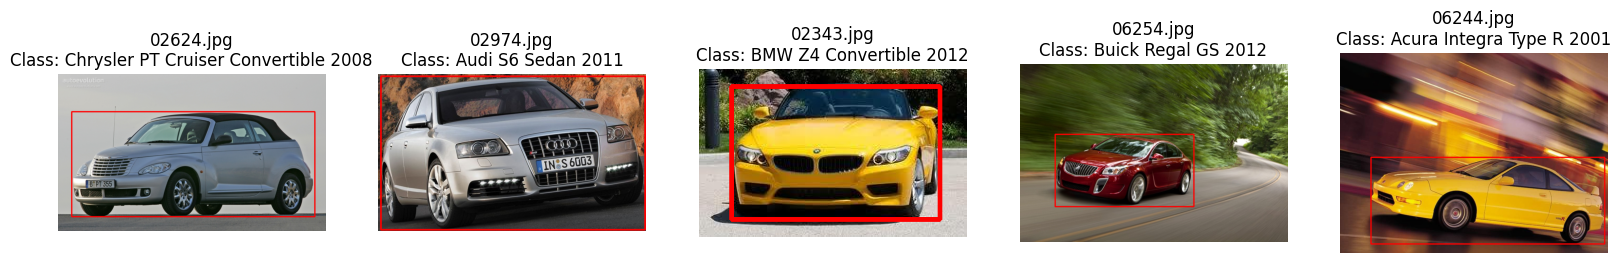

time: 883 ms (started: 2025-03-20 14:50:31 +00:00)


In [ ]:

import cv2
import random

random_samples = random.sample(train_annotations, 5)

def display_images_with_annotations(samples, dataset_path, df):
    fig, axes = plt.subplots(1, 5, figsize=(20, 5))

    if len(samples) < 5:
        print("Not enough images to display.")
        return

    for idx, sample in enumerate(samples):
        if len(sample) < 2:
            print(f"Skipping invalid sample: {sample}")
            continue

        image_name, class_num = sample
        image_path = os.path.join(dataset_path, "cars_train/cars_train", image_name)

        if not os.path.exists(image_path):
            print(f"Image not found: {image_path}")
            continue

        image = cv2.imread(image_path)
        if image is None:
            print(f"Failed to load image: {image_path}")
            continue

        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

        row = df[df['image'] == image_name]
        if not row.empty:
            x1, y1, x2, y2 = int(row.iloc[0]['x1']), int(row.iloc[0]['y1']), int(row.iloc[0]['x2']), int(row.iloc[0]['y2'])
            cv2.rectangle(image, (x1, y1), (x2, y2), (255, 0, 0), 3)

            print(f"🔹 Image: {image_name} | Class: {train_class_names[class_num]}")
            print(f"   Bounding Box → x1: {x1}, y1: {y1}, x2: {x2}, y2: {y2}")

        title_text = f"{image_name}\nClass: {train_class_names[class_num]}"
        axes[idx].imshow(image)
        axes[idx].set_title(title_text)
        axes[idx].axis("off")

    plt.show()

dataset_path = "/content/dataset"
display_images_with_annotations(random_samples, dataset_path, train_df)


The code randomly displays 5 images from the test set along with their class names. If an image cannot be loaded, an error message is shown; otherwise, the image is displayed with the appropriate label.

Image: 00511.jpg | Class #106 → Ford F-450 Super Duty Crew Cab 2012
Image: 00402.jpg | Class #194 → Volvo 240 Sedan 1993
Image: 04012.jpg | Class #5 → Acura TSX Sedan 2012
Image: 05408.jpg | Class #124 → HUMMER H3T Crew Cab 2010
Image: 06087.jpg | Class #187 → Toyota Camry Sedan 2012


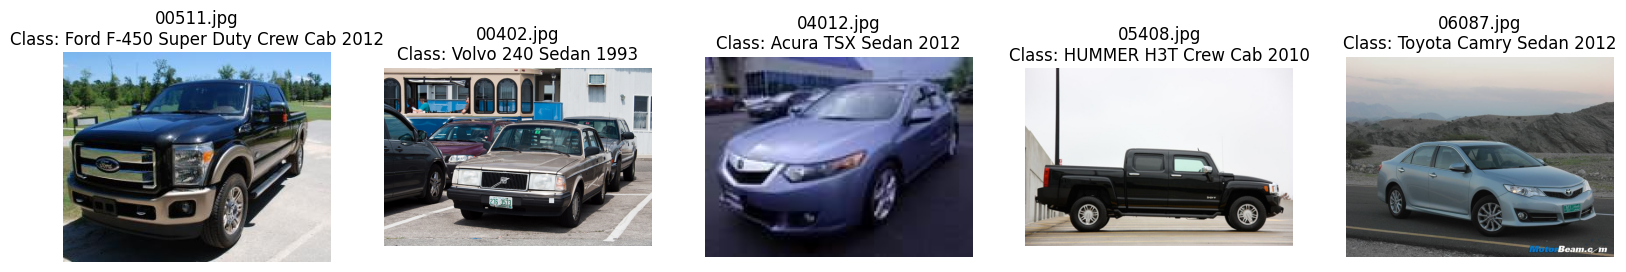

time: 1.24 s (started: 2025-03-20 14:50:36 +00:00)


In [ ]:

metadata_path = "/content/dataset/stanford_cars_with_class_names.xlsx"
xls = pd.ExcelFile(metadata_path)
test_df = pd.read_excel(xls, sheet_name="test")

test_df["image"] = test_df["image"].astype(str).str.replace("'", "")

TEST_IMAGE_PATH = "/content/dataset/cars_test/cars_test/"

def display_random_test_images(df, dataset_path, num_samples=5):
    """
    Displays random test images along with their class names.
    """
    fig, axes = plt.subplots(1, num_samples, figsize=(20, 5))

    samples = df.sample(n=num_samples, random_state=random.randint(0, 10000))

    for idx, (_, row) in enumerate(samples.iterrows()):
        image_name = row["image"]
        image_path = os.path.join(dataset_path, image_name)

        if not os.path.exists(image_path):
            print(f"Image not found: {image_path}")
            continue

        image = cv2.imread(image_path)
        if image is None:
            print(f"Failed to load image: {image_path}")
            continue

        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        class_name = row["ture_class_name"]
        class_num = int(row["class"])

        print(f"Image: {image_name} | Class #{class_num} → {class_name}")

        title_text = f"{image_name}\nClass: {class_name}"
        axes[idx].imshow(image)
        axes[idx].set_title(title_text)
        axes[idx].axis("off")

    plt.show()

display_random_test_images(test_df, TEST_IMAGE_PATH, num_samples=5)




This code implements a **customized MobileNetV2-based model** for classifying **196 car categories**. The **pretrained MobileNetV2** is used as a **feature extractor**, with only the first **14 layers** retained while freezing their weights to prevent training. A **new classification head** is added, including **Batch Normalization, Dropout, and Fully Connected layers**, to enhance generalization and reduce **overfitting**. The model uses **Adaptive Average Pooling** to aggregate features and is optimized with **Adam** using weight decay for regularization. MobileNetV2 was chosen due to its **efficiency, speed, and strong feature extraction capability** on small datasets.

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import models

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

base_model = models.mobilenet_v2(pretrained=True)
base_model = base_model.features[:14]
base_model.to(device)
base_model.eval()

for param in base_model.parameters():
    param.requires_grad = False

class MobileNetV2Custom(nn.Module):
    def __init__(self, base_model, num_classes=196):
        super(MobileNetV2Custom, self).__init__()
        self.base_model = base_model
        self.global_pool = nn.AdaptiveAvgPool2d((1, 1))
        self.flatten = nn.Flatten()
        self.batch_norm1 = nn.BatchNorm1d(96)
        self.fc1 = nn.Linear(96, 128)
        self.dropout1 = nn.Dropout(0.3)
        self.fc2 = nn.Linear(128, 64)
        self.dropout2 = nn.Dropout(0.5)
        self.output_layer = nn.Linear(64, num_classes)

    def forward(self, x):
     x = self.base_model(x)
     x = self.global_pool(x)
     x = self.flatten(x)
     x = self.batch_norm1(x)

     x = self.fc1(x)
     x = torch.relu(x)

     x = self.dropout1(x)

     x = self.fc2(x)
     x = torch.relu(x)

     x = self.dropout2(x)
     x = self.output_layer(x)

     return x


model = MobileNetV2Custom(base_model).to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.003, weight_decay=0.001)
print(model)
print("MobileNetV2 Model with Reduced Overfitting Prepared!")


/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=MobileNet_V2_Weights.IMAGENET1K_V1`. You can also use `weights=MobileNet_V2_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/mobilenet_v2-b0353104.pth" to /root/.cache/torch/hub/checkpoints/mobilenet_v2-b0353104.pth
100%|██████████| 13.6M/13.6M [00:00<00:00, 88.2MB/s]


MobileNetV2Custom(
  (base_model): Sequential(
    (0): Conv2dNormActivation(
      (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
      (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU6(inplace=True)
    )
    (1): InvertedResidual(
      (conv): Sequential(
        (0): Conv2dNormActivation(
          (0): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), groups=32, bias=False)
          (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
          (2): ReLU6(inplace=True)
        )
        (1): Conv2d(32, 16, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (2): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
    )
    (2): InvertedResidual(
      (conv): Sequential(
        (0): Conv2dNormActivation(
          (0): Conv2d(16, 96, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (1): BatchNorm2d(

### **Experiment 1: Data Processing and Custom MobileNetV2 Model**
This script loads and preprocesses the Stanford Cars Dataset, applying extensive data augmentation to improve model generalization. It splits the dataset into training, validation, and test sets while ensuring class balance. The MobileNetV2 backbone is modified by keeping only the first 14 layers, freezing early layers, and fine-tuning deeper ones. A custom classification head is added with Batch Normalization, Dropout, and Fully Connected layers. The training process uses Adam optimizer, learning rate scheduling, and early stopping to prevent overfitting and improve convergence.

In [ ]:
import os
import torch
import pandas as pd
from sklearn.model_selection import train_test_split
from torch.utils.data import DataLoader, Dataset
from torchvision import transforms, models
from PIL import Image
import numpy as np
import warnings
warnings.filterwarnings("ignore")

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(" Using device:", device)

TRAIN_IMAGE_PATH = "/content/dataset/cars_train/cars_train/"
TEST_IMAGE_PATH = "/content/dataset/cars_test/cars_test/"

IMG_SIZE = (224, 224)
BATCH_SIZE = 32

train_df["class"] = train_df["class"].astype(str)
test_df["class"] = test_df["class"].astype(str)


train_df, val_df = train_test_split(train_df, test_size=0.3, stratify=train_df["class"], random_state=42)

train_transforms = transforms.Compose([
    transforms.RandomResizedCrop(224, scale=(0.8, 1.0)),
    transforms.RandomHorizontalFlip(),
    transforms.RandomVerticalFlip(),
    transforms.RandomRotation(10),
    transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2, hue=0.1),
    transforms.RandomAffine(degrees=0, translate=(0.1, 0.1)),
    transforms.RandomPerspective(distortion_scale=0.2, p=0.5),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
])


val_test_transforms = transforms.Compose([
    transforms.Resize(IMG_SIZE),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

class CarsDataset(Dataset):
    def __init__(self, dataframe, image_dir, transform=None):
        self.dataframe = dataframe
        self.image_dir = image_dir
        self.transform = transform
        self.image_paths = dataframe["image"].values
        self.labels = dataframe["class"].values
        self.class_to_idx = {cls_name: idx for idx, cls_name in enumerate(sorted(self.dataframe["class"].unique()))}

    def __len__(self):
        return len(self.dataframe)

    def __getitem__(self, idx):
        image_name = self.image_paths[idx]
        image_path = os.path.join(self.image_dir, image_name)

        image = Image.open(image_path).convert("RGB")
        label = self.class_to_idx[self.labels[idx]]

        if self.transform:
            image = self.transform(image)

        return image, label

train_dataset = CarsDataset(train_df, TRAIN_IMAGE_PATH, transform=train_transforms)
train_loader = DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=True, num_workers=6)

val_dataset = CarsDataset(val_df, TRAIN_IMAGE_PATH, transform=val_test_transforms)
val_loader = DataLoader(val_dataset, batch_size=BATCH_SIZE, shuffle=False, num_workers=6)

test_dataset = CarsDataset(test_df, TEST_IMAGE_PATH, transform=val_test_transforms)
test_loader = DataLoader(test_dataset, batch_size=BATCH_SIZE, shuffle=False, num_workers=6)

base_model = models.mobilenet_v2(pretrained=True)
base_model = base_model.features[:14]

for layer in base_model[10:]:
    layer.requires_grad = True

class MobileNetV2Custom(torch.nn.Module):
    def __init__(self, base_model, num_classes=196):
        super(MobileNetV2Custom, self).__init__()
        self.base_model = base_model
        self.global_pool = torch.nn.AdaptiveAvgPool2d((1, 1))
        self.flatten = torch.nn.Flatten()
        self.batch_norm1 = torch.nn.BatchNorm1d(96)
        self.fc1 = torch.nn.Linear(96, 128)
        self.dropout1 = torch.nn.Dropout(0.3)
        self.fc2 = torch.nn.Linear(128, 64)
        self.dropout2 = torch.nn.Dropout(0.5)
        self.output_layer = torch.nn.Linear(64, num_classes)

    def forward(self, x):
        x = self.base_model(x)
        x = self.global_pool(x)
        x = self.flatten(x)
        x = self.batch_norm1(x)
        x = self.fc1(x)
        x = torch.relu(x)
        x = self.dropout1(x)
        x = self.fc2(x)
        x = torch.relu(x)
        x = self.dropout2(x)
        x = self.output_layer(x)
        return x

model = MobileNetV2Custom(base_model).to(device)

learning_rate = 0.001
criterion = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate, weight_decay=0.0001)
scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode='min', factor=0.5, patience=3, verbose=True)

class EarlyStopping:
    def __init__(self, patience=10, delta=0):
        self.patience = patience
        self.delta = delta
        self.counter = 0
        self.best_loss = np.inf
        self.early_stop = False

    def __call__(self, val_loss):
        if val_loss < self.best_loss - self.delta:
            self.best_loss = val_loss
            self.counter = 0
        else:
            self.counter += 1
            if self.counter >= self.patience:
                self.early_stop = True

early_stopping = EarlyStopping(patience=10)

print("Data preprocessing and model setup completed successfully!")


 Using device: cuda
Data preprocessing and model setup completed successfully!
time: 1.13 s (started: 2025-03-20 14:51:06 +00:00)


## **Experiment 1: Training the Model**

This script defines the training and validation process for the MobileNetV2-based classification model. The training loop runs for 20 epochs, using the Adam optimizer with weight decay for regularization and CrossEntropyLoss as the loss function. The StepLR scheduler reduces the learning rate every 5 epochs by a factor of 0.5 to improve convergence. Gradient clipping (clip value = 1.0) is applied to prevent exploding gradients. The validation phase evaluates the model's accuracy, precision, recall, and F1 score without updating weights. Early stopping is implemented to halt training if validation loss does not improve for 10 consecutive epochs, preventing overfitting. The model’s performance is monitored through multiple evaluation metrics and visualizations to analyze its effectiveness in classifying 196 car categories.

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.metrics import precision_score, recall_score, f1_score
import warnings
warnings.filterwarnings("ignore")

EPOCHS_1 = 20
learning_rate_1 = 0.001
min_learning_rate_1 = 1e-5

criterion_1 = nn.CrossEntropyLoss()
optimizer_1 = optim.Adam(model.parameters(), lr=learning_rate_1, weight_decay=0.001)
scheduler_1 = torch.optim.lr_scheduler.StepLR(optimizer_1, step_size=5, gamma=0.5)

for layer in base_model[5:]:
    layer.requires_grad = True


train_losses_1 = []
val_losses_1 = []
train_accs_1 = []
val_accs_1 = []
train_precisions_1 = []
val_precisions_1 = []
train_recalls_1 = []
val_recalls_1 = []
train_f1s_1 = []
val_f1s_1 = []

def train_one_epoch_1(model, dataloader, optimizer, criterion, device, clip_value=1.0):
    model.train()
    running_loss = 0.0
    correct = 0
    total = 0
    all_labels = []
    all_preds = []

    for images, labels in dataloader:
        images, labels = images.to(device), labels.to(device)

        optimizer.zero_grad()

        outputs = model(images)
        loss = criterion(outputs, labels)

        loss.backward()
        torch.nn.utils.clip_grad_norm_(model.parameters(), clip_value)
        optimizer.step()

        running_loss += loss.item() * images.size(0)
        _, predicted = torch.max(outputs, 1)

        total += labels.size(0)
        correct += (predicted == labels).sum().item()

        all_labels.extend(labels.cpu().numpy())
        all_preds.extend(predicted.cpu().numpy())

    epoch_loss_1 = running_loss / len(dataloader.dataset)
    epoch_acc_1 = 100 * correct / total


    epoch_precision_1 = precision_score(all_labels, all_preds, average='macro')
    epoch_recall_1 = recall_score(all_labels, all_preds, average='macro')
    epoch_f1_1 = f1_score(all_labels, all_preds, average='macro')

    return epoch_loss_1, epoch_acc_1, epoch_precision_1, epoch_recall_1, epoch_f1_1

def validate_1(model, dataloader, criterion, device):
    model.eval()
    running_loss = 0.0
    correct = 0
    total = 0
    all_labels = []
    all_preds = []

    with torch.no_grad():
        for images, labels in dataloader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            loss = criterion(outputs, labels)

            running_loss += loss.item() * images.size(0)
            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

            all_labels.extend(labels.cpu().numpy())
            all_preds.extend(predicted.cpu().numpy())

    val_loss_1 = running_loss / len(dataloader.dataset)
    val_acc_1 = 100 * correct / total


    val_precision_1 = precision_score(all_labels, all_preds, average='macro')
    val_recall_1 = recall_score(all_labels, all_preds, average='macro')
    val_f1_1 = f1_score(all_labels, all_preds, average='macro')

    return val_loss_1, val_acc_1, val_precision_1, val_recall_1, val_f1_1

print(" Starting Training for Experiment 1...")

for epoch in range(EPOCHS_1):
    train_loss_1, train_acc_1, train_prec_1, train_rec_1, train_f1_1 = train_one_epoch_1(model, train_loader, optimizer_1, criterion_1, device)
    val_loss_1, val_acc_1, val_prec_1, val_rec_1, val_f1_1 = validate_1(model, val_loader, criterion_1, device)


    train_losses_1.append(train_loss_1)
    val_losses_1.append(val_loss_1)
    train_accs_1.append(train_acc_1)
    val_accs_1.append(val_acc_1)
    train_precisions_1.append(train_prec_1)
    val_precisions_1.append(val_prec_1)
    train_recalls_1.append(train_rec_1)
    val_recalls_1.append(val_rec_1)
    train_f1s_1.append(train_f1_1)
    val_f1s_1.append(val_f1_1)

    print(f"Epoch [{epoch+1}/{EPOCHS_1}], Loss: {train_loss_1:.4f}, Acc: {train_acc_1:.2f}%, "
          f"Val Loss: {val_loss_1:.4f}, Val Acc: {val_acc_1:.2f}%, "
          f"Precision: {val_prec_1:.4f}, Recall: {val_rec_1:.4f}, F1 Score: {val_f1_1:.4f}")

    scheduler_1.step(val_loss_1)

    early_stopping(val_loss_1)
    if early_stopping.early_stop:
        print("Early stopping triggered for Experiment 1.")
        break

print("Training for Experiment 1 complete.")


 Starting Training for Experiment 1...
Epoch [1/20], Loss: 5.2922, Acc: 0.47%, Val Loss: 5.2755, Val Acc: 0.98%, Precision: 0.0004, Recall: 0.0068, F1 Score: 0.0007
Epoch [2/20], Loss: 5.2663, Acc: 0.61%, Val Loss: 5.2260, Val Acc: 0.82%, Precision: 0.0004, Recall: 0.0071, F1 Score: 0.0006
Epoch [3/20], Loss: 5.2344, Acc: 0.93%, Val Loss: 5.1838, Val Acc: 1.43%, Precision: 0.0006, Recall: 0.0112, F1 Score: 0.0010
Epoch [4/20], Loss: 5.1802, Acc: 1.32%, Val Loss: 5.1020, Val Acc: 2.09%, Precision: 0.0009, Recall: 0.0172, F1 Score: 0.0016
Epoch [5/20], Loss: 5.1131, Acc: 1.49%, Val Loss: 5.0481, Val Acc: 1.76%, Precision: 0.0009, Recall: 0.0142, F1 Score: 0.0016
Epoch [6/20], Loss: 5.0164, Acc: 1.58%, Val Loss: 4.9534, Val Acc: 1.72%, Precision: 0.0012, Recall: 0.0151, F1 Score: 0.0020
Epoch [7/20], Loss: 4.9842, Acc: 1.53%, Val Loss: 5.0489, Val Acc: 1.76%, Precision: 0.0017, Recall: 0.0148, F1 Score: 0.0027
Epoch [8/20], Loss: 4.8654, Acc: 1.61%, Val Loss: 4.7753, Val Acc: 2.13%, Preci

**Experiment 1 - Plot Training and Validation Loss**

The code visualizes training and validation loss, accuracy, precision, recall, and F1 score over 20 epochs, providing a comprehensive analysis of the model's performance. These metrics help detect overfitting or underfitting and assess the model's classification quality. Additionally, a learning rate schedule graph is included to show how the StepLR scheduler adjusts the learning rate every 5 epochs. By tracking these metrics, we can fine-tune hyperparameters like learning rate, weight decay, and regularization techniques to improve model generalization and stability.

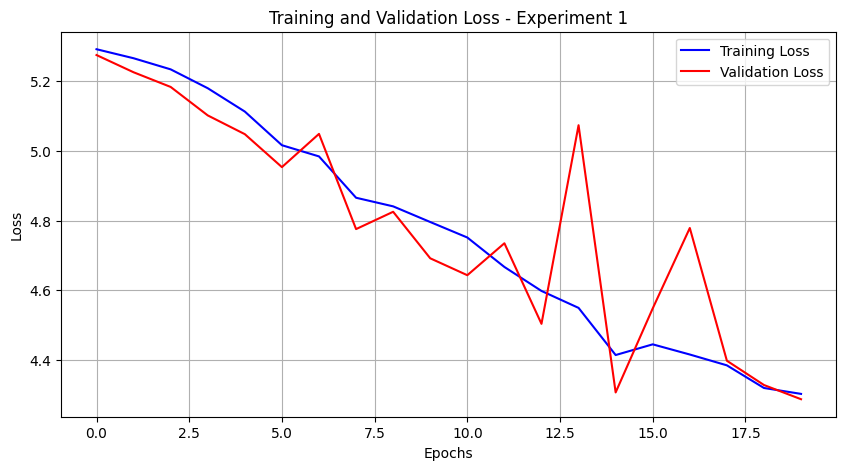

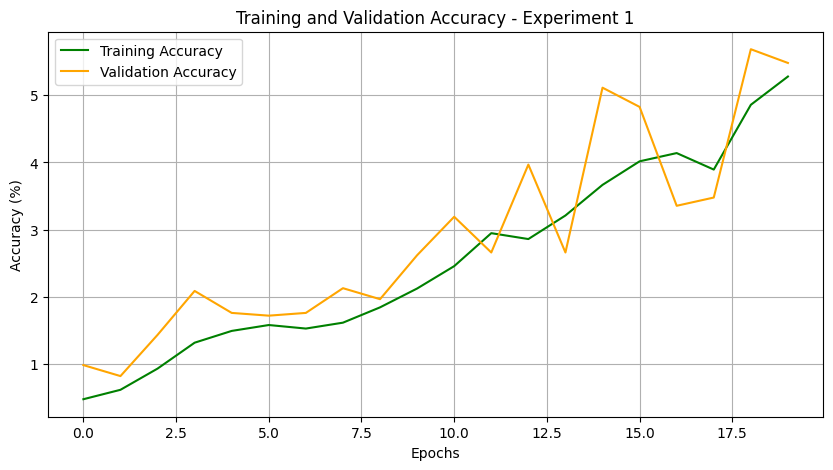

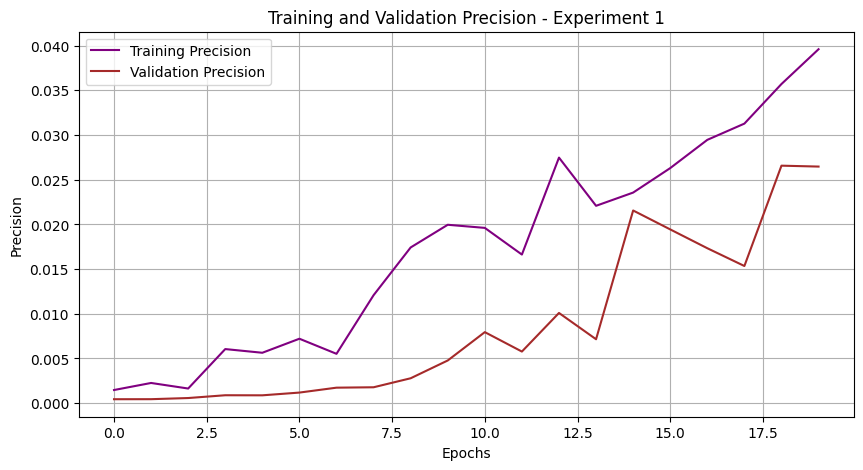

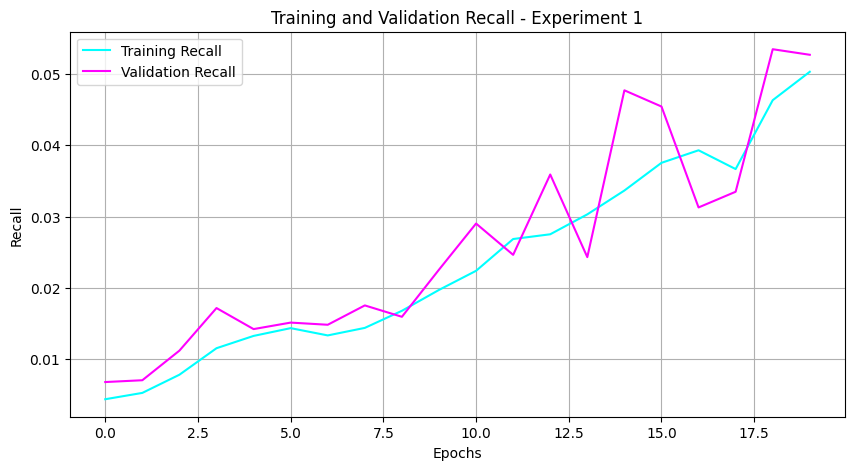

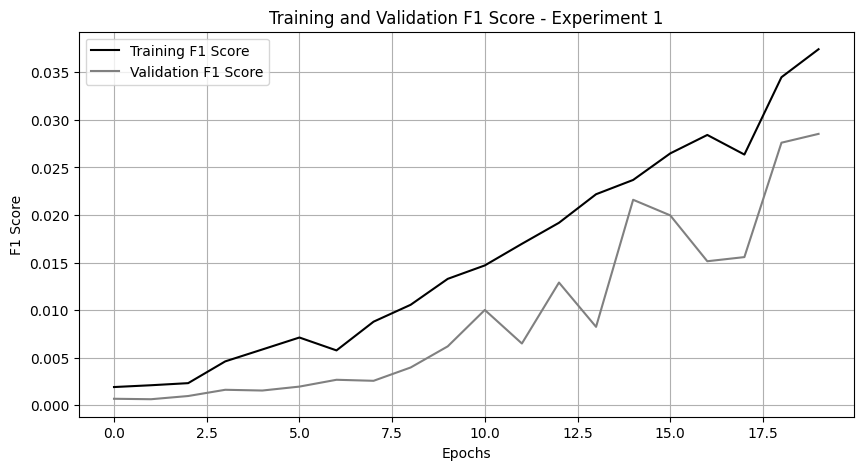

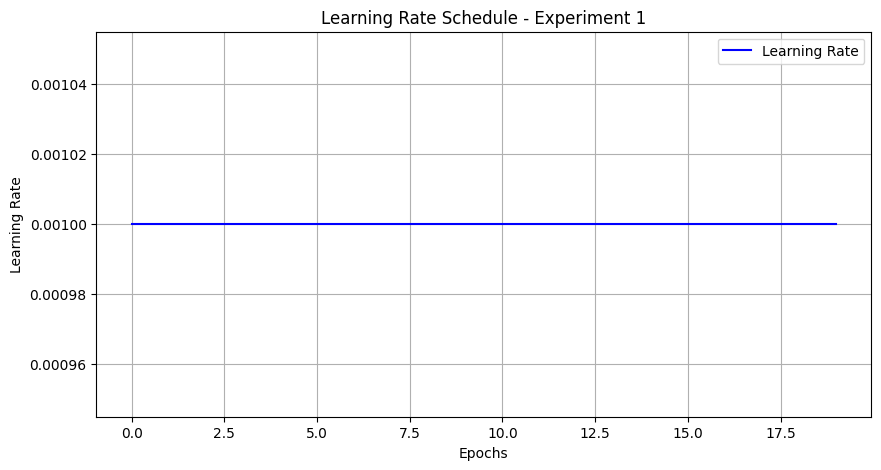

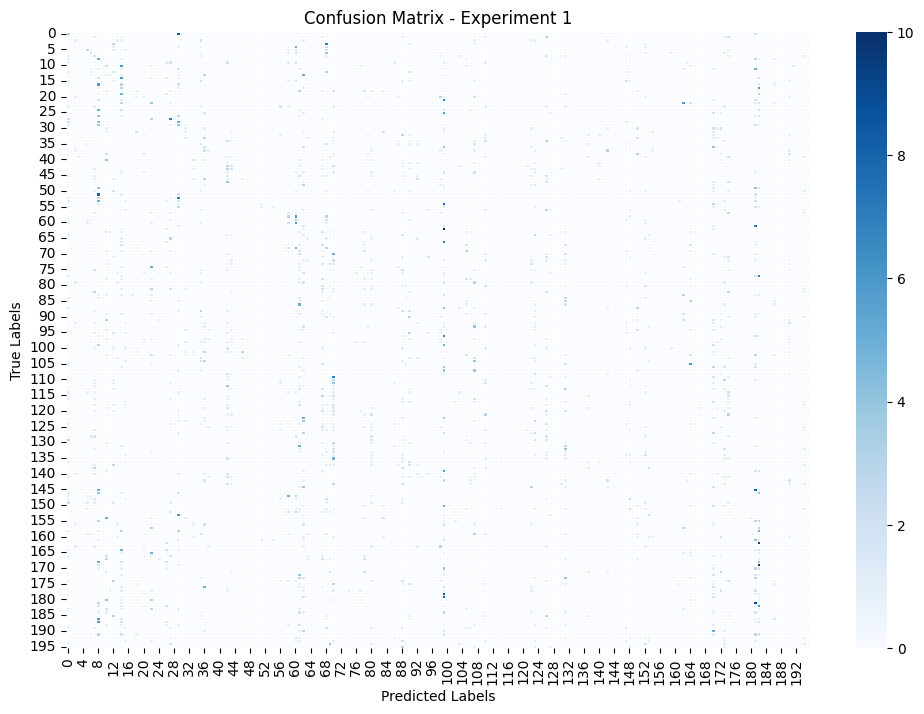

Training complete for Experiment 1!
Final training accuracy: 5.28%
Final validation accuracy: 5.48%
Final training precision: 0.0396
Final validation precision: 0.0265
Final training recall: 0.0503
Final validation recall: 0.0527
Final training F1 score: 0.0374
Final validation F1 score: 0.0285
time: 20.7 s (started: 2025-03-20 15:24:08 +00:00)


In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns


plt.figure(figsize=(10, 5))
plt.plot(train_losses_1, label="Training Loss", color="blue")
plt.plot(val_losses_1, label="Validation Loss", color="red")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Training and Validation Loss - Experiment 1")
plt.legend()
plt.grid(True)
plt.show()


plt.figure(figsize=(10, 5))
plt.plot(train_accs_1, label="Training Accuracy", color="green")
plt.plot(val_accs_1, label="Validation Accuracy", color="orange")
plt.xlabel("Epochs")
plt.ylabel("Accuracy (%)")
plt.title("Training and Validation Accuracy - Experiment 1")
plt.legend()
plt.grid(True)
plt.show()


plt.figure(figsize=(10, 5))
plt.plot(train_precisions_1, label="Training Precision", color="purple")
plt.plot(val_precisions_1, label="Validation Precision", color="brown")
plt.xlabel("Epochs")
plt.ylabel("Precision")
plt.title("Training and Validation Precision - Experiment 1")
plt.legend()
plt.grid(True)
plt.show()


plt.figure(figsize=(10, 5))
plt.plot(train_recalls_1, label="Training Recall", color="cyan")
plt.plot(val_recalls_1, label="Validation Recall", color="magenta")
plt.xlabel("Epochs")
plt.ylabel("Recall")
plt.title("Training and Validation Recall - Experiment 1")
plt.legend()
plt.grid(True)
plt.show()


plt.figure(figsize=(10, 5))
plt.plot(train_f1s_1, label="Training F1 Score", color="black")
plt.plot(val_f1s_1, label="Validation F1 Score", color="gray")
plt.xlabel("Epochs")
plt.ylabel("F1 Score")
plt.title("Training and Validation F1 Score - Experiment 1")
plt.legend()
plt.grid(True)
plt.show()


plt.figure(figsize=(10, 5))
learning_rates_1 = [scheduler_1.get_last_lr()[0] for _ in range(len(train_losses_1))]
plt.plot(range(len(train_losses_1)), learning_rates_1, label="Learning Rate", color="blue")
plt.xlabel("Epochs")
plt.ylabel("Learning Rate")
plt.title("Learning Rate Schedule - Experiment 1")
plt.legend()
plt.grid(True)
plt.show()

all_preds_1 = []
all_labels_1 = []


model.eval()
with torch.no_grad():
    for images, labels in val_loader:
        images, labels = images.to(device), labels.to(device)
        outputs = model(images)
        _, preds = torch.max(outputs, 1)

        all_preds_1.extend(preds.cpu().numpy())
        all_labels_1.extend(labels.cpu().numpy())


conf_matrix_1 = confusion_matrix(all_labels_1, all_preds_1)


plt.figure(figsize=(12, 8))
sns.heatmap(conf_matrix_1, annot=False, cmap="Blues", fmt="d", linewidths=0.5)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix - Experiment 1")
plt.show()


print("Training complete for Experiment 1!")
print(f"Final training accuracy: {train_accs_1[-1]:.2f}%")
print(f"Final validation accuracy: {val_accs_1[-1]:.2f}%")
print(f"Final training precision: {train_precisions_1[-1]:.4f}")
print(f"Final validation precision: {val_precisions_1[-1]:.4f}")
print(f"Final training recall: {train_recalls_1[-1]:.4f}")
print(f"Final validation recall: {val_recalls_1[-1]:.4f}")
print(f"Final training F1 score: {train_f1s_1[-1]:.4f}")
print(f"Final validation F1 score: {val_f1s_1[-1]:.4f}")


##**Experiment 1 - TEST**##

This code evaluates the model on 5 random test images, calculating the average Cross-Entropy Loss to measure generalization. It displays the top-1 prediction and top-5 predictions with confidence scores, showing model accuracy and certainty. The images are denormalized and visualized for human interpretation, helping to identify misclassifications and assess model performance.


Final Test Loss: 4.1775


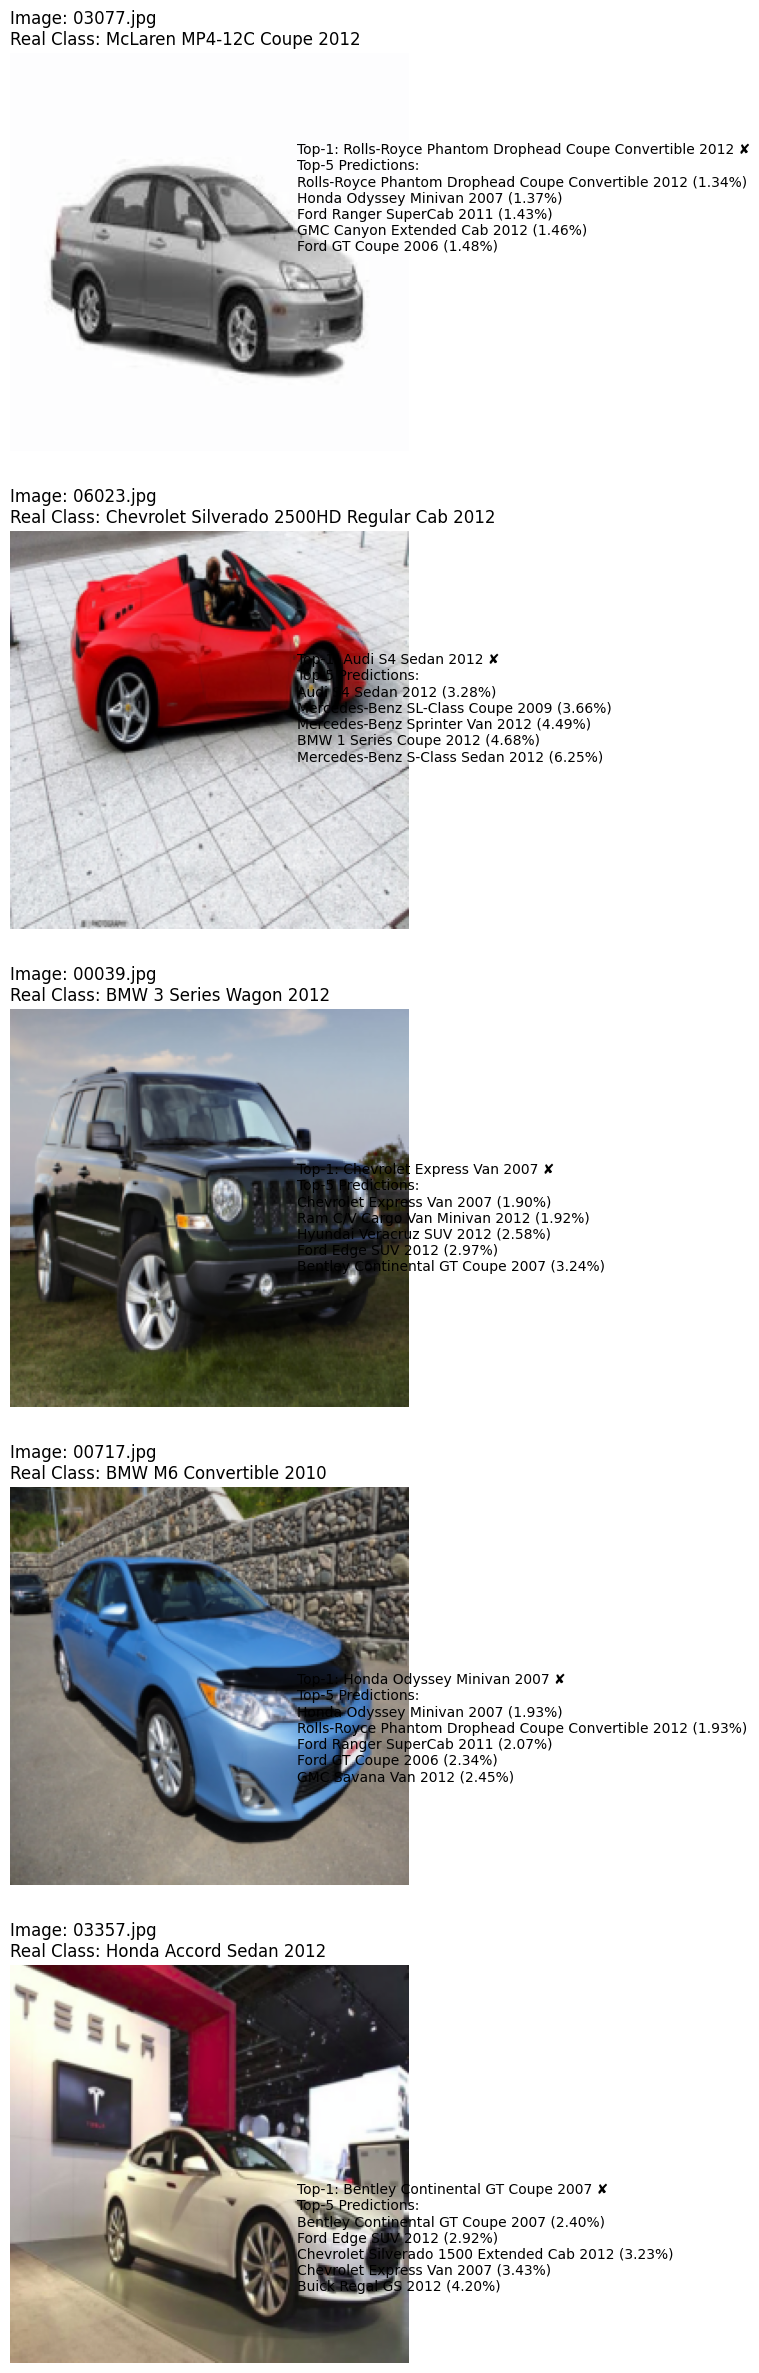

time: 1.01 s (started: 2025-03-20 15:24:29 +00:00)


In [ ]:
import random
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import torch


criterion = torch.nn.CrossEntropyLoss()

random_indices = random.sample(range(len(test_dataset)), 5)
random_images = [test_dataset.image_paths[i] for i in random_indices]
true_labels = [test_dataset.labels[i] for i in random_indices]

def denormalize(image_tensor):
    mean = np.array([0.485, 0.456, 0.406])
    std = np.array([0.229, 0.224, 0.225])
    image_tensor = image_tensor.numpy().transpose((1, 2, 0))
    image_tensor = std * image_tensor + mean
    image_tensor = np.clip(image_tensor, 0, 1)
    return image_tensor

model.eval()
predicted_classes = []
top_5_predictions = []
top_5_probs = []
total_loss = 0.0
total_samples = 0

with torch.no_grad():
    for idx in random_indices:
        image, true_label = test_dataset[idx]
        image = image.unsqueeze(0).to(device)
        label = torch.tensor([true_label]).to(device)

        outputs = model(image)
        loss = criterion(outputs, label)
        total_loss += loss.item() * image.size(0)
        total_samples += image.size(0)

        probabilities = torch.nn.functional.softmax(outputs, dim=1).cpu().numpy()

        predicted_class = np.argmax(probabilities, axis=1)[0]
        predicted_classes.append(predicted_class)

        top_5 = np.argsort(probabilities, axis=1)[:, -5:][0]
        top_5_confidences = np.sort(probabilities, axis=1)[:, -5:][0]

        top_5_predictions.append(top_5)
        top_5_probs.append(top_5_confidences)


average_test_loss = total_loss / total_samples
print(f"\nFinal Test Loss: {average_test_loss:.4f}")

fig, axes = plt.subplots(5, 1, figsize=(10, 30))

for idx, (image_name, true_label) in enumerate(zip(random_images, true_labels)):
    image_path = os.path.join(TEST_IMAGE_PATH, image_name)

    if not os.path.exists(image_path):
        print(f"File not found: {image_path}")
        continue

    image = Image.open(image_path).convert("RGB")
    image_tensor, _ = test_dataset[idx]
    image_np = denormalize(image_tensor)

    true_label = int(true_label)

    predicted_label = predicted_classes[idx]
    top_5 = top_5_predictions[idx]
    top_5_confidences = top_5_probs[idx]
    correct = "✔" if predicted_label == true_label else "✘"
    top_5_text = "\n".join([f"{train_class_names[i]} ({top_5_confidences[j]*100:.2f}%)" for j, i in enumerate(top_5[::-1])])

    axes[idx].imshow(image_np)
    axes[idx].axis("off")
    axes[idx].set_title(f"Image: {image_name}\nReal Class: {train_class_names[true_label-1]}", fontsize=12, loc='left')

    plt.figtext(0.6, 0.85 - (idx * 0.17), f"Top-1: {train_class_names[predicted_label]} {correct}\nTop-5 Predictions:\n{top_5_text}", fontsize=10, verticalalignment='top')

plt.show()


**Experiment 1 -Model Evaluation**

This code evaluates the model on the entire test set, calculating the **Top-1 Accuracy**, **Top-5 Accuracy**, and the **average Cross-Entropy Loss**. It uses `softmax` for class probabilities and compares predictions with true labels for accuracy metrics. The **Top-1 Accuracy** shows how often the model's top choice is correct, while **Top-5 Accuracy** measures if the true class is among the model's top 5 predictions. The **average test loss** indicates how well the model generalizes to unseen data. These metrics provide a comprehensive evaluation of model performance and reliability.

In [ ]:
import numpy as np
from sklearn.metrics import accuracy_score, top_k_accuracy_score
import torch

criterion = torch.nn.CrossEntropyLoss()

model.eval()
all_predictions = []
all_true_labels = []

total_loss = 0.0
total_samples = 0

with torch.no_grad():
    for images, labels in test_loader:
        images, labels = images.to(device), labels.to(device)

        outputs = model(images)
        loss = criterion(outputs, labels)

        total_loss += loss.item() * images.size(0)
        total_samples += images.size(0)

        probabilities = torch.nn.functional.softmax(outputs, dim=1).cpu().numpy()
        predicted_classes = np.argmax(probabilities, axis=1)

        all_predictions.extend(probabilities)
        all_true_labels.extend(labels.cpu().numpy())

all_predictions = np.array(all_predictions)
all_true_labels = np.array(all_true_labels)

basic_model_test_accuracy = accuracy_score(all_true_labels, np.argmax(all_predictions, axis=1))
basic_model_top_5_accuracy = top_k_accuracy_score(all_true_labels, all_predictions, k=5)


basic_model_average_test_loss = total_loss / total_samples

print(f"Test Accuracy (Top-1): {basic_model_test_accuracy:.4f} %")
print(f"Test Top-5 Accuracy: {basic_model_top_5_accuracy:.4f} %")
print(f"Final Test Loss: {basic_model_average_test_loss:.4f}")



Test Accuracy (Top-1): 0.0566 %
Test Top-5 Accuracy: 0.2061 %
Final Test Loss: 4.2923
time: 1min 4s (started: 2025-03-20 15:25:04 +00:00)


**Save the Trained Model**

In [ ]:
torch.save(model.state_dict(), 'car_classification_MobileNetV2.pth')
print("Model saved as : car_classification_MobileNetV2.pth")


Model saved as : car_classification_MobileNetV2.pth
time: 24.5 ms (started: 2025-03-20 15:26:20 +00:00)


## **Data Augmentation Preview**

This code visualizes the effects of Data Augmentation to assess how transformations modify the training images before they are fed into the model. It ensures that the augmentations enhance diversity without introducing distortions that could negatively impact training. The transformations applied include random flipping, grayscale conversion, cropping, and color jittering, simulating real-world variations in image data. This step is essential for quality assurance and serves as a foundation for Experiment 2, where Data Augmentation is integrated into model training to improve generalization, robustness, and prevent overfitting.

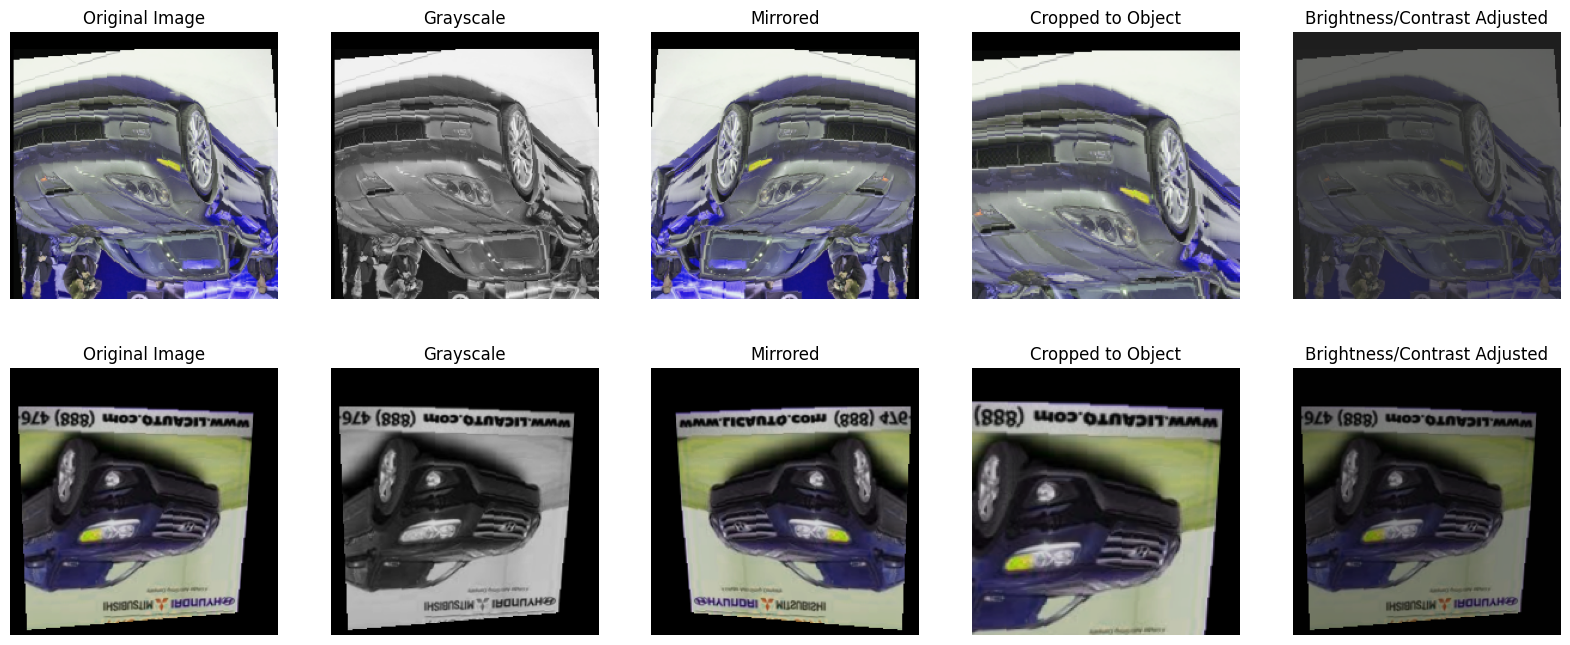

 Starting Training for Experiment 2...
Epoch [1/10], Loss: 4.2971, Acc: 5.23%, Precision: 0.0302, Recall: 0.0558, F1 Score: 0.0281
Epoch [2/10], Loss: 4.2398, Acc: 5.35%, Precision: 0.0159, Recall: 0.0392, F1 Score: 0.0178
Epoch [3/10], Loss: 4.1993, Acc: 4.65%, Precision: 0.0326, Recall: 0.0534, F1 Score: 0.0294
Epoch [4/10], Loss: 4.1754, Acc: 5.70%, Precision: 0.0231, Recall: 0.0227, F1 Score: 0.0122
Epoch [5/10], Loss: 4.0341, Acc: 6.67%, Precision: 0.0648, Recall: 0.0907, F1 Score: 0.0578
Epoch [6/10], Loss: 4.1199, Acc: 5.58%, Precision: 0.0278, Recall: 0.0568, F1 Score: 0.0318
Epoch [7/10], Loss: 4.1114, Acc: 5.88%, Precision: 0.0147, Recall: 0.0367, F1 Score: 0.0163
Epoch [8/10], Loss: 4.1022, Acc: 5.82%, Precision: 0.0403, Recall: 0.0736, F1 Score: 0.0421
Epoch [9/10], Loss: 4.0851, Acc: 6.19%, Precision: 0.0479, Recall: 0.0680, F1 Score: 0.0402
Epoch [10/10], Loss: 4.0610, Acc: 6.14%, Precision: 0.0397, Recall: 0.0745, F1 Score: 0.0431
Training for Experiment 2 complete.
time

In [ ]:
import torch
import numpy as np
import random
import matplotlib.pyplot as plt
import os
from torchvision import transforms
from PIL import Image
from sklearn.metrics import precision_score, recall_score, f1_score
import warnings
warnings.filterwarnings("ignore")


aug_transforms = transforms.Compose([
    transforms.Resize(IMG_SIZE),
    transforms.RandomHorizontalFlip(p=0.5),
    transforms.RandomApply([transforms.Grayscale(num_output_channels=3)], p=0.3),
    transforms.ColorJitter(brightness=0.3, contrast=0.3),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])


denormalize = transforms.Compose([
    transforms.Normalize(mean=[-0.485 / 0.229, -0.456 / 0.224, -0.406 / 0.225],
                         std=[1 / 0.229, 1 / 0.224, 1 / 0.225]),
    transforms.ToPILImage()
])


random_indices = random.sample(range(len(train_dataset)), 2)
random_samples = [train_dataset[i] for i in random_indices]

def display_augmentation_effects(samples):
    fig, axes = plt.subplots(len(samples), 5, figsize=(20, 8))

    for idx, (image_tensor, label) in enumerate(samples):
        image_np = denormalize(image_tensor).convert("RGB")

        grayscale = transforms.Grayscale(num_output_channels=3)(image_np)
        mirrored = transforms.RandomHorizontalFlip(p=1.0)(image_np)

        width, height = image_np.size
        cropped = transforms.RandomCrop((int(height * 0.8), int(width * 0.8)))(image_np)

        bright_contrast = transforms.ColorJitter(brightness=0.5, contrast=0.5)(image_np)

        axes[idx, 0].imshow(image_np)
        axes[idx, 0].set_title("Original Image")

        axes[idx, 1].imshow(grayscale, cmap="gray")
        axes[idx, 1].set_title("Grayscale")

        axes[idx, 2].imshow(mirrored)
        axes[idx, 2].set_title("Mirrored")

        axes[idx, 3].imshow(cropped)
        axes[idx, 3].set_title("Cropped to Object")

        axes[idx, 4].imshow(bright_contrast)
        axes[idx, 4].set_title("Brightness/Contrast Adjusted")

        for ax in axes[idx]:
            ax.axis("off")

    plt.show()

display_augmentation_effects(random_samples)



EPOCHS_2 = 10
learning_rate_2 = 0.001
min_learning_rate_2 = 1e-5

criterion_2 = torch.nn.CrossEntropyLoss()
optimizer_2 = torch.optim.Adam(model.parameters(), lr=learning_rate_2, weight_decay=0.001)
scheduler_2 = torch.optim.lr_scheduler.StepLR(optimizer_2, step_size=5, gamma=0.5)


train_losses_2 = []
val_losses_2 = []
train_accs_2 = []
val_accs_2 = []
train_precisions_2 = []
val_precisions_2 = []
train_recalls_2 = []
val_recalls_2 = []
train_f1s_2 = []
val_f1s_2 = []

def train_one_epoch_2(model, dataloader, optimizer, criterion, device, clip_value=1.0):
    model.train()
    running_loss = 0.0
    correct = 0
    total = 0
    all_labels = []
    all_preds = []

    for images, labels in dataloader:
        images, labels = images.to(device), labels.to(device)

        optimizer.zero_grad()

        outputs = model(images)
        loss = criterion(outputs, labels)

        loss.backward()
        torch.nn.utils.clip_grad_norm_(model.parameters(), clip_value)
        optimizer.step()

        running_loss += loss.item() * images.size(0)
        _, predicted = torch.max(outputs, 1)

        total += labels.size(0)
        correct += (predicted == labels).sum().item()

        all_labels.extend(labels.cpu().numpy())
        all_preds.extend(predicted.cpu().numpy())

    epoch_loss_2 = running_loss / len(dataloader.dataset)
    epoch_acc_2 = 100 * correct / total


    epoch_precision_2 = precision_score(all_labels, all_preds, average='macro')
    epoch_recall_2 = recall_score(all_labels, all_preds, average='macro')
    epoch_f1_2 = f1_score(all_labels, all_preds, average='macro')

    return epoch_loss_2, epoch_acc_2, epoch_precision_2, epoch_recall_2, epoch_f1_2

def validate_2(model, dataloader, criterion, device):
    model.eval()
    running_loss = 0.0
    correct = 0
    total = 0
    all_labels = []
    all_preds = []

    with torch.no_grad():
        for images, labels in dataloader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            loss = criterion(outputs, labels)

            running_loss += loss.item() * images.size(0)
            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

            all_labels.extend(labels.cpu().numpy())
            all_preds.extend(predicted.cpu().numpy())

    val_loss_2 = running_loss / len(dataloader.dataset)
    val_acc_2 = 100 * correct / total


    val_precision_2 = precision_score(all_labels, all_preds, average='macro')
    val_recall_2 = recall_score(all_labels, all_preds, average='macro')
    val_f1_2 = f1_score(all_labels, all_preds, average='macro')

    return val_loss_2, val_acc_2, val_precision_2, val_recall_2, val_f1_2

print(" Starting Training for Experiment 2...")

for epoch in range(EPOCHS_2):
    train_loss_2, train_acc_2, train_prec_2, train_rec_2, train_f1_2 = train_one_epoch_2(model, train_loader, optimizer_2, criterion_2, device)
    val_loss_2, val_acc_2, val_prec_2, val_rec_2, val_f1_2 = validate_2(model, val_loader, criterion_2, device)


    train_losses_2.append(train_loss_2)
    val_losses_2.append(val_loss_2)
    train_accs_2.append(train_acc_2)
    val_accs_2.append(val_acc_2)
    train_precisions_2.append(train_prec_2)
    val_precisions_2.append(val_prec_2)
    train_recalls_2.append(train_rec_2)
    val_recalls_2.append(val_rec_2)
    train_f1s_2.append(train_f1_2)
    val_f1s_2.append(val_f1_2)

    print(f"Epoch [{epoch+1}/{EPOCHS_2}], Loss: {train_loss_2:.4f}, Acc: {train_acc_2:.2f}%, "
          f"Precision: {val_prec_2:.4f}, Recall: {val_rec_2:.4f}, F1 Score: {val_f1_2:.4f}")

    scheduler_2.step(val_loss_2)

print("Training for Experiment 2 complete.")


This section presents the impact of data augmentation on the model’s training and validation performance. The loss curves demonstrate how well the model converges, while the accuracy graphs indicate classification improvements throughout training. The precision, recall, and F1-score plots evaluate the model’s ability to distinguish between different categories effectively. Additionally, the learning rate schedule showcases the adjustments in learning rate during training to optimize convergence. These insights help assess the effectiveness of data augmentation in improving generalization and preventing overfitting.

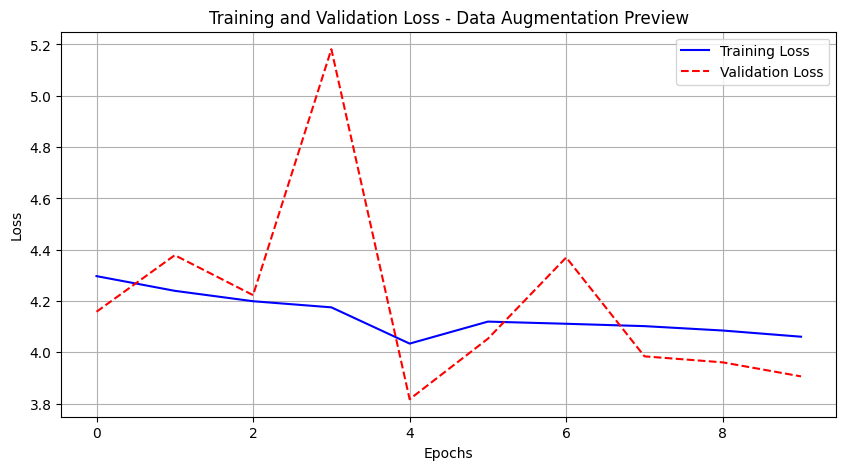

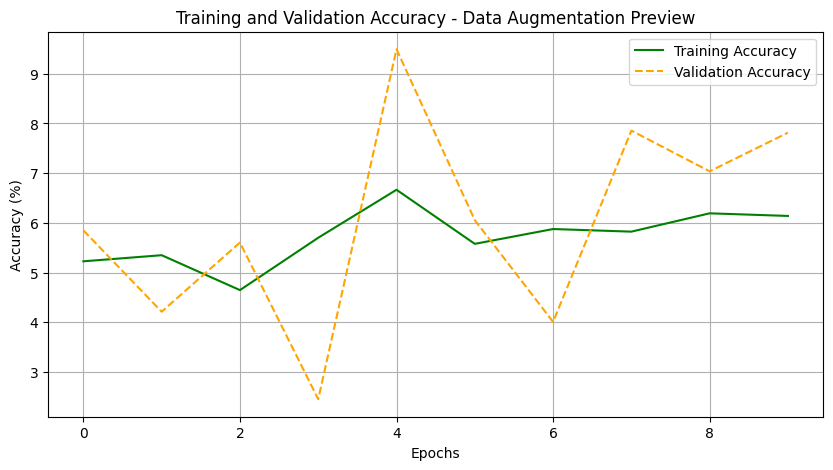

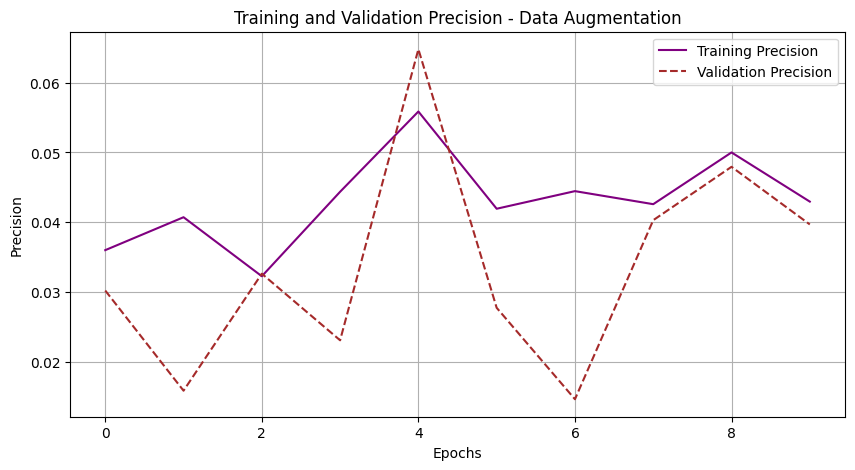

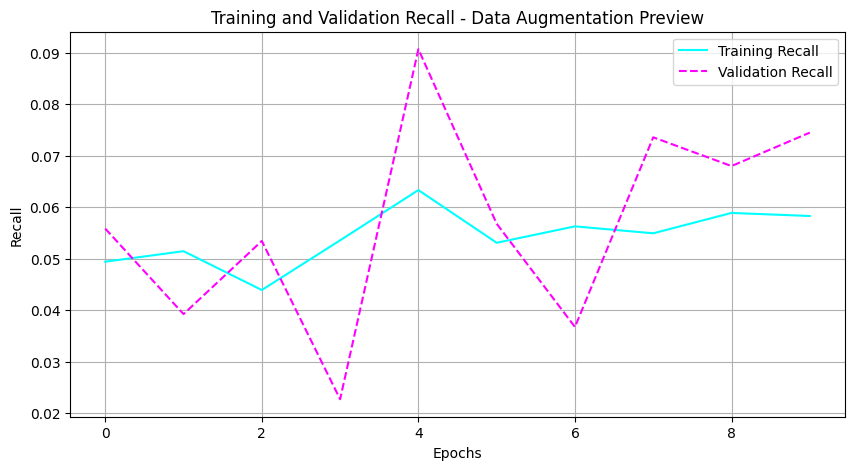

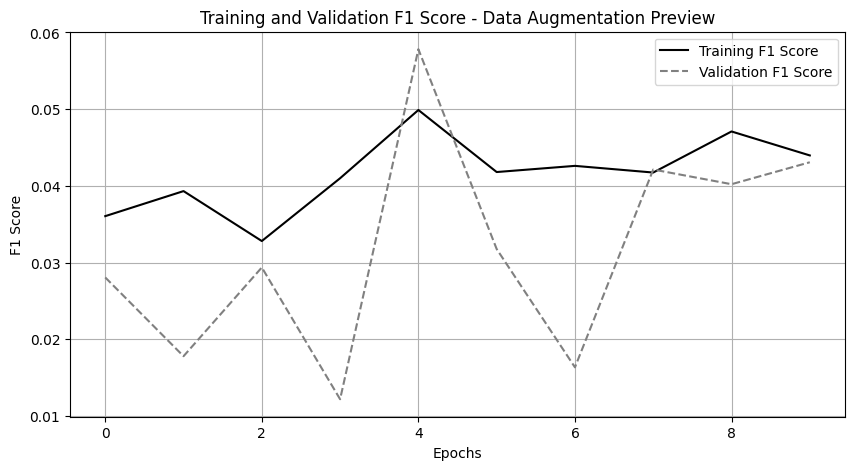

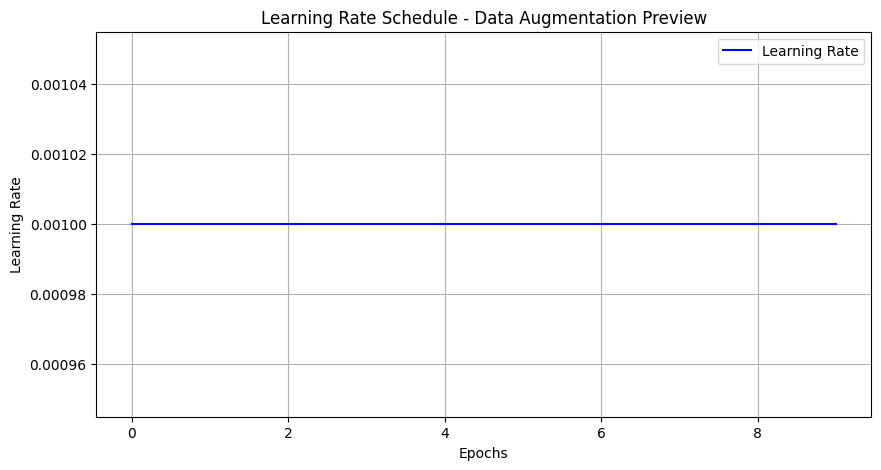

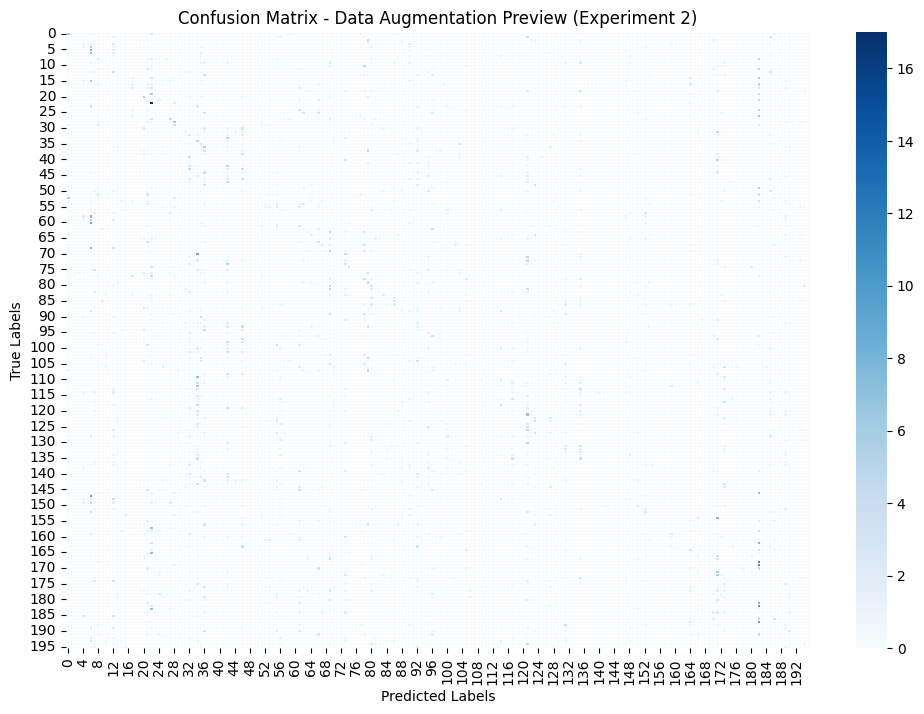

Training complete for Data Augmentation Preview!
Final training accuracy: 6.14%
Final validation accuracy: 7.82%
Final training precision: 0.0430
Final validation precision: 0.0397
Final training recall: 0.0583
Final validation recall: 0.0745
Final training F1 score: 0.0440
Final validation F1 score: 0.0431
time: 20.3 s (started: 2025-03-20 15:42:46 +00:00)


In [ ]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix


plt.figure(figsize=(10, 5))
plt.plot(train_losses_2, label="Training Loss", color="blue", linestyle='-')
plt.plot(val_losses_2, label="Validation Loss", color="red", linestyle='--')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Training and Validation Loss - Data Augmentation Preview")
plt.legend()
plt.grid(True)
plt.show()


plt.figure(figsize=(10, 5))
plt.plot(train_accs_2, label="Training Accuracy", color="green", linestyle='-')
plt.plot(val_accs_2, label="Validation Accuracy", color="orange", linestyle='--')
plt.xlabel("Epochs")
plt.ylabel("Accuracy (%)")
plt.title("Training and Validation Accuracy - Data Augmentation Preview")
plt.legend()
plt.grid(True)
plt.show()


plt.figure(figsize=(10, 5))
plt.plot(train_precisions_2, label="Training Precision", color="purple", linestyle='-')
plt.plot(val_precisions_2, label="Validation Precision", color="brown", linestyle='--')
plt.xlabel("Epochs")
plt.ylabel("Precision")
plt.title("Training and Validation Precision - Data Augmentation")
plt.legend()
plt.grid(True)
plt.show()


plt.figure(figsize=(10, 5))
plt.plot(train_recalls_2, label="Training Recall", color="cyan", linestyle='-')
plt.plot(val_recalls_2, label="Validation Recall", color="magenta", linestyle='--')
plt.xlabel("Epochs")
plt.ylabel("Recall")
plt.title("Training and Validation Recall - Data Augmentation Preview")
plt.legend()
plt.grid(True)
plt.show()


plt.figure(figsize=(10, 5))
plt.plot(train_f1s_2, label="Training F1 Score", color="black", linestyle='-')
plt.plot(val_f1s_2, label="Validation F1 Score", color="gray", linestyle='--')
plt.xlabel("Epochs")
plt.ylabel("F1 Score")
plt.title("Training and Validation F1 Score - Data Augmentation Preview")
plt.legend()
plt.grid(True)
plt.show()


plt.figure(figsize=(10, 5))
learning_rates_2 = [scheduler_2.get_last_lr()[0] for _ in range(len(train_losses_2))]
plt.plot(range(len(train_losses_2)), learning_rates_2, label="Learning Rate", color="blue", linestyle='-')
plt.xlabel("Epochs")
plt.ylabel("Learning Rate")
plt.title("Learning Rate Schedule - Data Augmentation Preview")
plt.legend()
plt.grid(True)
plt.show()


all_preds_2 = []
all_labels_2 = []


model.eval()
with torch.no_grad():
    for images, labels in val_loader:
        images, labels = images.to(device), labels.to(device)
        outputs = model(images)
        _, preds = torch.max(outputs, 1)

        all_preds_2.extend(preds.cpu().numpy())
        all_labels_2.extend(labels.cpu().numpy())


conf_matrix_2 = confusion_matrix(all_labels_2, all_preds_2)


plt.figure(figsize=(12, 8))
sns.heatmap(conf_matrix_2, annot=False, cmap="Blues", fmt="d", linewidths=0.5)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix - Data Augmentation Preview (Experiment 2)")
plt.show()


print("Training complete for Data Augmentation Preview!")
print(f"Final training accuracy: {train_accs_2[-1]:.2f}%")
print(f"Final validation accuracy: {val_accs_2[-1]:.2f}%")
print(f"Final training precision: {train_precisions_2[-1]:.4f}")
print(f"Final validation precision: {val_precisions_2[-1]:.4f}")
print(f"Final training recall: {train_recalls_2[-1]:.4f}")
print(f"Final validation recall: {val_recalls_2[-1]:.4f}")
print(f"Final training F1 score: {train_f1s_2[-1]:.4f}")
print(f"Final validation F1 score: {val_f1s_2[-1]:.4f}")


## **Data Augmentation and Data Preparation**

This code defines data augmentation and normalization transformations for training and validation datasets using PyTorch's `transforms.Compose()`. The training transformations include resizing, random horizontal flip, grayscale application, color jitter, affine transformations, and random cropping to enhance model generalization, while the validation transformations only involve resizing and normalization to maintain consistency during evaluation.


In [ ]:
from torchvision import transforms

train_transforms = transforms.Compose([
    transforms.Resize(IMG_SIZE),
    transforms.RandomHorizontalFlip(p=0.5),
    transforms.RandomApply([transforms.Grayscale(num_output_channels=3)], p=0.3),
    transforms.ColorJitter(brightness=0.3, contrast=0.3),
    transforms.RandomAffine(degrees=15, translate=(0.1, 0.1), scale=(0.9, 1.1)),
    transforms.RandomCrop((224, 224), padding=10),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

val_test_transforms = transforms.Compose([
    transforms.Resize(IMG_SIZE),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

print("MobileNetV2 Model with Data Augmentation Prepared!")

MobileNetV2 Model with Data Augmentation Prepared!
time: 1.97 ms (started: 2025-03-20 15:43:16 +00:00)


**Load & Compile Model with Data Augmentation**

This code applies **Data Augmentation** techniques to enhance the generalization of a MobileNetV2 model for vehicle classification. It uses transformations like flips, grayscale, color jitter, rotation, and cropping to make the model more robust to real-world variations, preventing overfitting. The augmented images are loaded into `DataLoader`s for training, and visualized to confirm the effectiveness of the transformations.

 Data Augmentation Applied! 


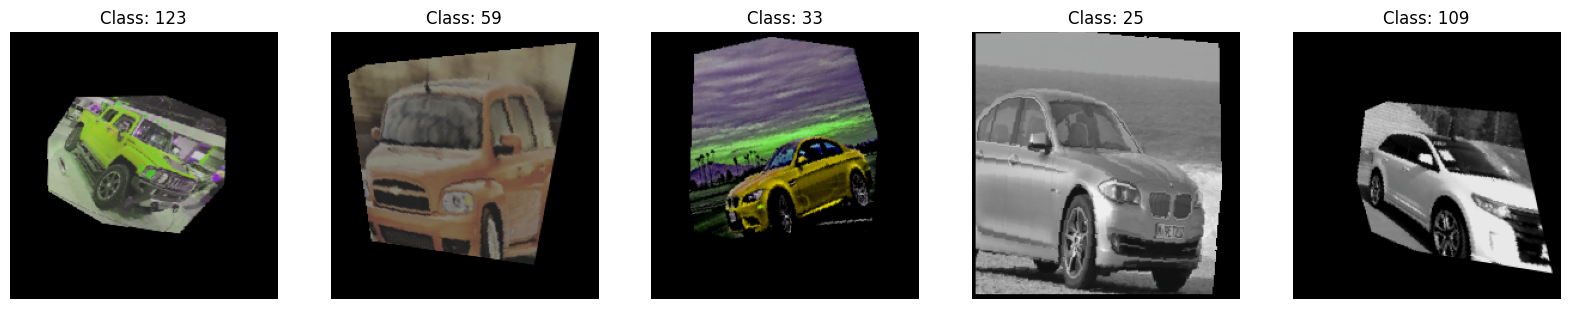

time: 740 ms (started: 2025-03-20 15:43:21 +00:00)


In [ ]:
from torchvision import transforms
import matplotlib.pyplot as plt
import random
import numpy as np
import torch
from torch.utils.data import DataLoader, Dataset
from PIL import Image


def denormalize(image, mean, std):
    mean = np.array(mean)
    std = np.array(std)
    image = image.cpu().numpy().transpose((1, 2, 0))
    image = std * image + mean
    image = np.clip(image, 0, 1)
    return image


train_transforms = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.RandomHorizontalFlip(p=0.5),
    transforms.RandomApply([transforms.Grayscale(num_output_channels=3)], p=0.3),
    transforms.ColorJitter(brightness=0.4, contrast=0.4, saturation=0.4, hue=0.2),
    transforms.RandomRotation(degrees=30),
    transforms.RandomAffine(degrees=15, translate=(0.2, 0.2), scale=(0.5, 1.5), shear=0.25),
    transforms.RandomCrop((224, 224), padding=10),
    transforms.RandomPerspective(distortion_scale=0.5, p=0.5),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

val_test_transforms = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])


class CarsDataset(Dataset):
    def __init__(self, df, image_path, transform=None):
        self.df = df
        self.image_path = image_path
        self.transform = transform

    def __len__(self):
        return len(self.df)

    def __getitem__(self, idx):
        image_name = self.df.iloc[idx]["image"]
        label = int(self.df.iloc[idx]["class"]) - 1
        image = Image.open(f"{self.image_path}/{image_name}").convert("RGB")


        if self.transform:
            image = self.transform(image)

        return image, label





train_dataset = CarsDataset(train_df, TRAIN_IMAGE_PATH, transform=train_transforms)
train_loader = DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=True, num_workers=0)

val_dataset = CarsDataset(val_df, TRAIN_IMAGE_PATH, transform=val_test_transforms)
val_loader = DataLoader(val_dataset, batch_size=BATCH_SIZE, shuffle=False, num_workers=0)

test_dataset = CarsDataset(test_df, TEST_IMAGE_PATH, transform=val_test_transforms)
test_loader = DataLoader(test_dataset, batch_size=BATCH_SIZE, shuffle=False, num_workers=0)

print(" Data Augmentation Applied! ")

def display_augmented_images(dataloader, num_images=5):
    mean = [0.485, 0.456, 0.406]
    std = [0.229, 0.224, 0.225]

    images, labels = next(iter(dataloader))
    images, labels = images[:num_images], labels[:num_images]

    fig, axes = plt.subplots(1, num_images, figsize=(20, 5))
    for i in range(num_images):
        image = denormalize(images[i], mean, std)
        axes[i].imshow(image)
        axes[i].set_title(f"Class: {labels[i].item()}")
        axes[i].axis("off")

    plt.show()

display_augmented_images(train_loader)


##**Experiment 2 - Train Model with Data Augmentation**

This code **trains a custom MobileNetV2 model** for classifying **196 car categories** using **Data Augmentation** to improve generalization. It customizes the model by removing the default classifier and adding fully connected layers with dropout to reduce overfitting. The code uses **Cross-Entropy Loss** and **Adam Optimizer** for efficient training and manages the dataset with **DataLoader**. It also includes **Early Stopping** to monitor validation loss and prevent overfitting. This approach enhances model robustness and accuracy, making it effective for vehicle classification tasks.

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, Dataset
from torchvision import models, transforms
from tqdm import tqdm
import copy
import numpy as np
from sklearn.metrics import precision_score, recall_score, f1_score
import warnings
warnings.filterwarnings("ignore")

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

EPOCHS_2B = 20
LEARNING_RATE_2B = 1e-4
PATIENCE_2B = 10
BATCH_SIZE_2B = 32
NUM_CLASSES_2B = 196


base_model_2B = models.mobilenet_v2(pretrained=True)
base_model_2B.classifier = nn.Sequential()
base_model_2B.to(device)
base_model_2B.eval()

class MobileNetV2Custom_2B(nn.Module):
    def __init__(self, base_model, num_classes=NUM_CLASSES_2B):
        super(MobileNetV2Custom_2B, self).__init__()
        self.base_model = base_model
        self.global_pool = nn.AdaptiveAvgPool2d((1, 1))
        self.flatten = nn.Flatten()
        self.fc1 = nn.Linear(1280, 512)
        self.relu = nn.ReLU()
        self.dropout = nn.Dropout(0.3)
        self.output_layer = nn.Linear(512, num_classes)

    def forward(self, x):
        x = self.base_model.features(x)
        x = self.global_pool(x)
        x = self.flatten(x)
        x = self.fc1(x)
        x = self.relu(x)
        x = self.dropout(x)
        x = self.output_layer(x)
        return x

model_2B = MobileNetV2Custom_2B(base_model_2B).to(device)

criterion_2B = nn.CrossEntropyLoss()
optimizer_2B = optim.Adam(model_2B.parameters(), lr=LEARNING_RATE_2B)


train_losses_2B = []
val_losses_2B = []
train_accs_2B = []
val_accs_2B = []
train_precisions_2B = []
val_precisions_2B = []
train_recalls_2B = []
val_recalls_2B = []
train_f1s_2B = []
val_f1s_2B = []


def train_one_epoch_2B(model, train_loader, criterion, optimizer, device):
    model.train()
    running_loss = 0.0
    correct_predictions = 0
    total_samples = 0
    all_labels = []
    all_preds = []

    for images, labels in tqdm(train_loader, desc="Training"):
        images, labels = images.to(device), labels.to(device)
        optimizer.zero_grad()

        outputs = model(images)
        loss = criterion(outputs, labels)

        loss.backward()
        optimizer.step()

        running_loss += loss.item() * images.size(0)
        _, preds = torch.max(outputs, 1)
        correct_predictions += torch.sum(preds == labels).item()
        total_samples += labels.size(0)

        all_labels.extend(labels.cpu().numpy())
        all_preds.extend(preds.cpu().numpy())

    epoch_loss = running_loss / total_samples
    epoch_acc = correct_predictions / total_samples
    epoch_precision = precision_score(all_labels, all_preds, average='macro')
    epoch_recall = recall_score(all_labels, all_preds, average='macro')
    epoch_f1 = f1_score(all_labels, all_preds, average='macro')

    return epoch_loss, epoch_acc, epoch_precision, epoch_recall, epoch_f1


def validate_2B(model, val_loader, criterion, device):
    model.eval()
    running_loss = 0.0
    correct_predictions = 0
    total_samples = 0
    all_labels = []
    all_preds = []

    with torch.no_grad():
        for images, labels in tqdm(val_loader, desc="Validating"):
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            loss = criterion(outputs, labels)

            running_loss += loss.item() * images.size(0)
            _, preds = torch.max(outputs, 1)
            correct_predictions += torch.sum(preds == labels).item()
            total_samples += labels.size(0)

            all_labels.extend(labels.cpu().numpy())
            all_preds.extend(preds.cpu().numpy())

    val_loss = running_loss / total_samples
    val_acc = correct_predictions / total_samples
    val_precision = precision_score(all_labels, all_preds, average='macro')
    val_recall = recall_score(all_labels, all_preds, average='macro')
    val_f1 = f1_score(all_labels, all_preds, average='macro')

    return val_loss, val_acc, val_precision, val_recall, val_f1

best_val_loss_2B = float('inf')
best_model_weights_2B = copy.deepcopy(model_2B.state_dict())
patience_counter_2B = 0

for epoch in range(EPOCHS_2B):
    print(f"\nEpoch {epoch+1}/{EPOCHS_2B}")

    train_loss, train_acc, train_prec, train_rec, train_f1 = train_one_epoch_2B(model_2B, train_loader, criterion_2B, optimizer_2B, device)
    val_loss, val_acc, val_prec, val_rec, val_f1 = validate_2B(model_2B, val_loader, criterion_2B, device)


    train_losses_2B.append(train_loss)
    val_losses_2B.append(val_loss)
    train_accs_2B.append(train_acc)
    val_accs_2B.append(val_acc)
    train_precisions_2B.append(train_prec)
    val_precisions_2B.append(val_prec)
    train_recalls_2B.append(train_rec)
    val_recalls_2B.append(val_rec)
    train_f1s_2B.append(train_f1)
    val_f1s_2B.append(val_f1)

    if val_loss < best_val_loss_2B:
        best_val_loss_2B = val_loss
        best_model_weights_2B = copy.deepcopy(model_2B.state_dict())
        patience_counter_2B = 0
    else:
        patience_counter_2B += 1

    if patience_counter_2B >= PATIENCE_2B:
        print(" Early stopping triggered!")
        break

model_2B.load_state_dict(best_model_weights_2B)
print("Training complete with Early Stopping!")


Using device: cuda

Epoch 1/20


Validating: 100%|██████████| 77/77 [00:22<00:00,  3.47it/s]



Epoch 2/20


Validating: 100%|██████████| 77/77 [00:22<00:00,  3.49it/s]



Epoch 3/20


Validating: 100%|██████████| 77/77 [00:22<00:00,  3.49it/s]



Epoch 4/20


Validating: 100%|██████████| 77/77 [00:21<00:00,  3.62it/s]



Epoch 5/20


Validating: 100%|██████████| 77/77 [00:22<00:00,  3.46it/s]



Epoch 6/20


Validating: 100%|██████████| 77/77 [00:22<00:00,  3.46it/s]



Epoch 7/20


Validating: 100%|██████████| 77/77 [00:22<00:00,  3.49it/s]



Epoch 8/20


Validating: 100%|██████████| 77/77 [00:21<00:00,  3.52it/s]



Epoch 9/20


Validating: 100%|██████████| 77/77 [00:21<00:00,  3.51it/s]



Epoch 10/20


Validating: 100%|██████████| 77/77 [00:22<00:00,  3.48it/s]



Epoch 11/20


Validating: 100%|██████████| 77/77 [00:22<00:00,  3.49it/s]



Epoch 12/20


Validating: 100%|██████████| 77/77 [00:21<00:00,  3.50it/s]



Epoch 13/20


Validating: 100%|██████████| 77/77 [00:21<00:00,  3.50it/s]



Epoch 14/20


Validating: 100%|██████████| 77/77 [00:21<00:00,  3.63it/s]



Epoch 15/20


Validating: 100%|██████████| 77/77 [00:21<00:00,  3.52it/s]



Epoch 16/20


Validating: 100%|██████████| 77/77 [00:21<00:00,  3.52it/s]



Epoch 17/20


Validating: 100%|██████████| 77/77 [00:22<00:00,  3.46it/s]



Epoch 18/20


Validating: 100%|██████████| 77/77 [00:21<00:00,  3.51it/s]



Epoch 19/20


Validating: 100%|██████████| 77/77 [00:21<00:00,  3.54it/s]



Epoch 20/20


Validating: 100%|██████████| 77/77 [00:22<00:00,  3.47it/s]


Training complete with Early Stopping!
time: 41min 12s (started: 2025-03-20 15:43:28 +00:00)


##**Experiment 2 - Training Performance Visualization**

This section evaluates the performance of Experiment 2, which applies data augmentation to enhance the model’s robustness. The model’s training and validation loss curves indicate convergence behavior, while the accuracy plots reflect classification improvements over epochs. Additionally, the precision, recall, and F1-score graphs assess the model’s ability to correctly classify different categories. A confusion matrix visualizes prediction errors, and a per-class accuracy chart highlights category-specific performance. Finally, the learning rate schedule illustrates the adaptive learning process, ensuring stable optimization throughout training.

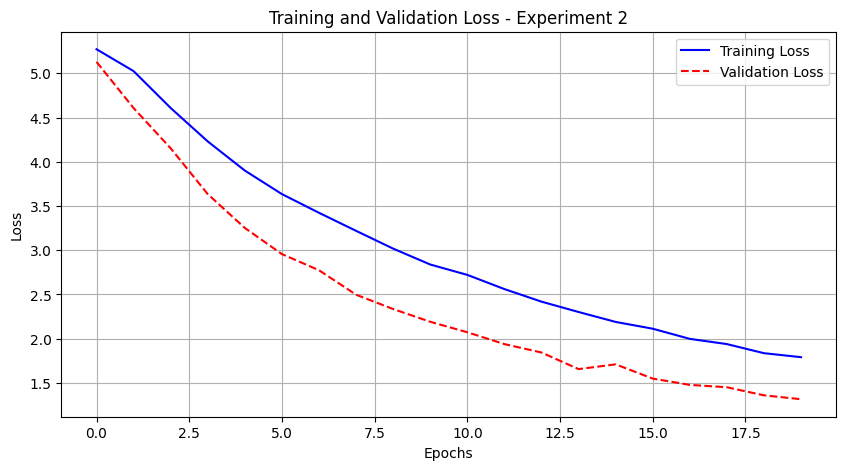

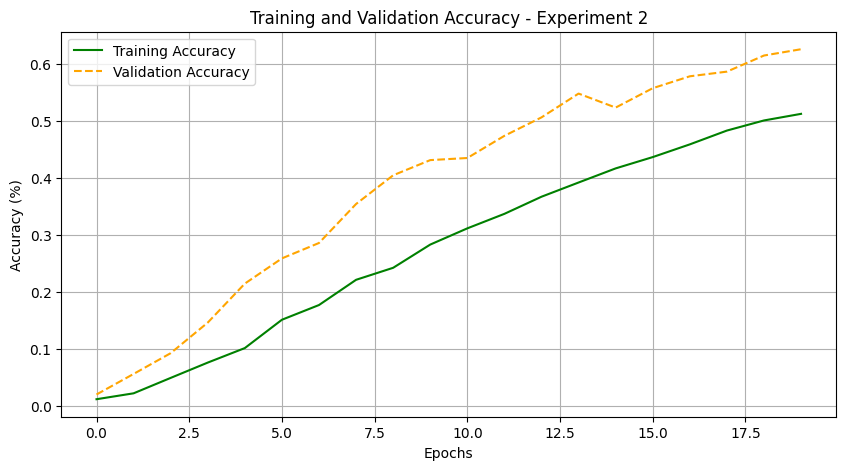

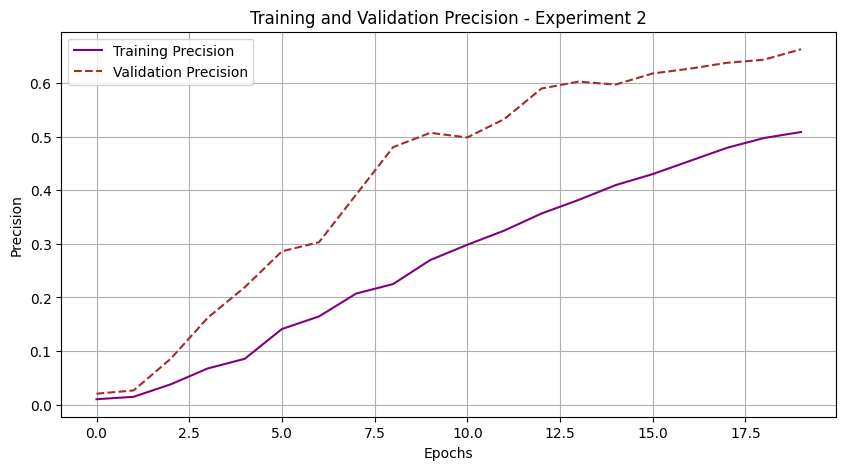

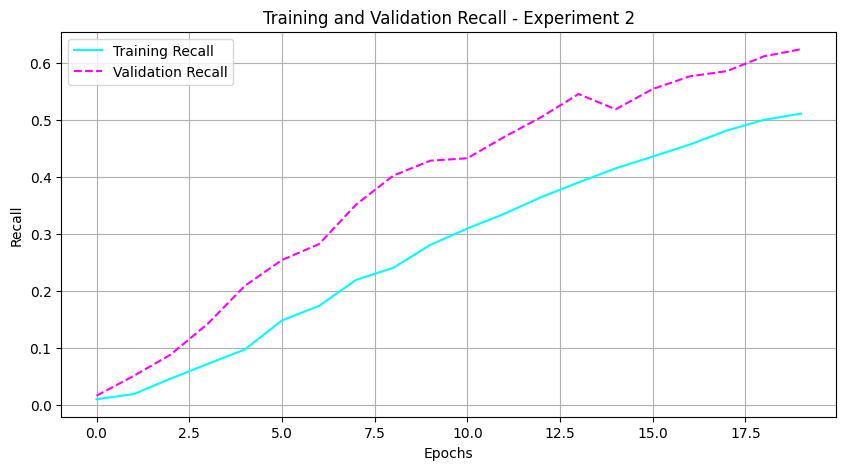

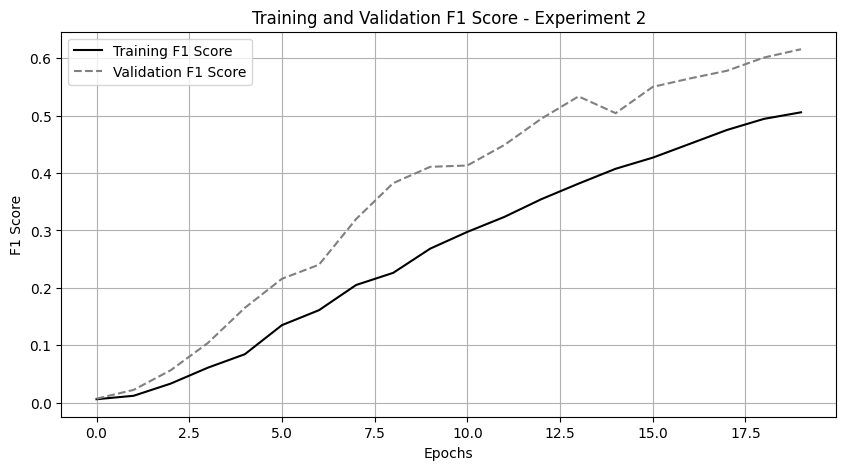

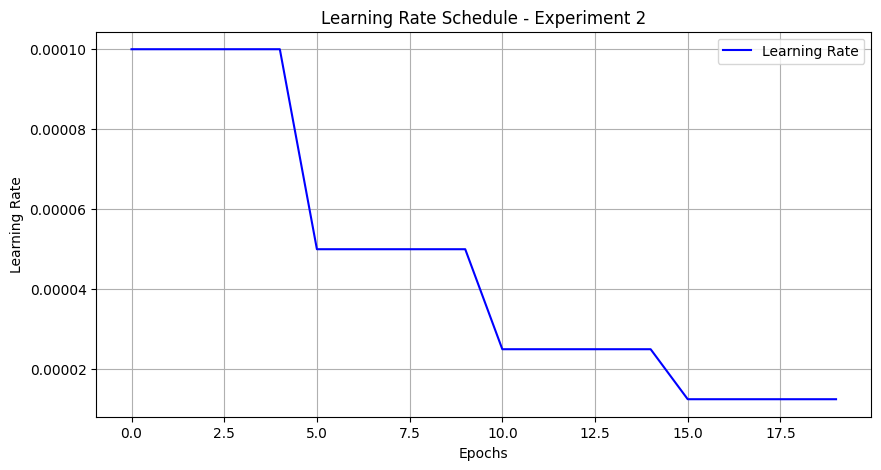

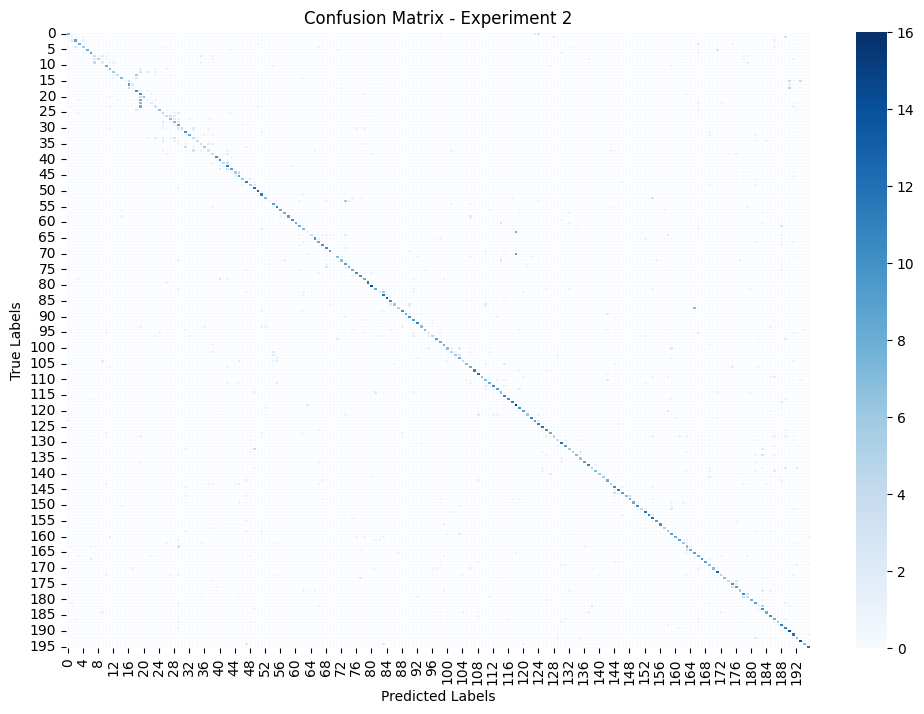

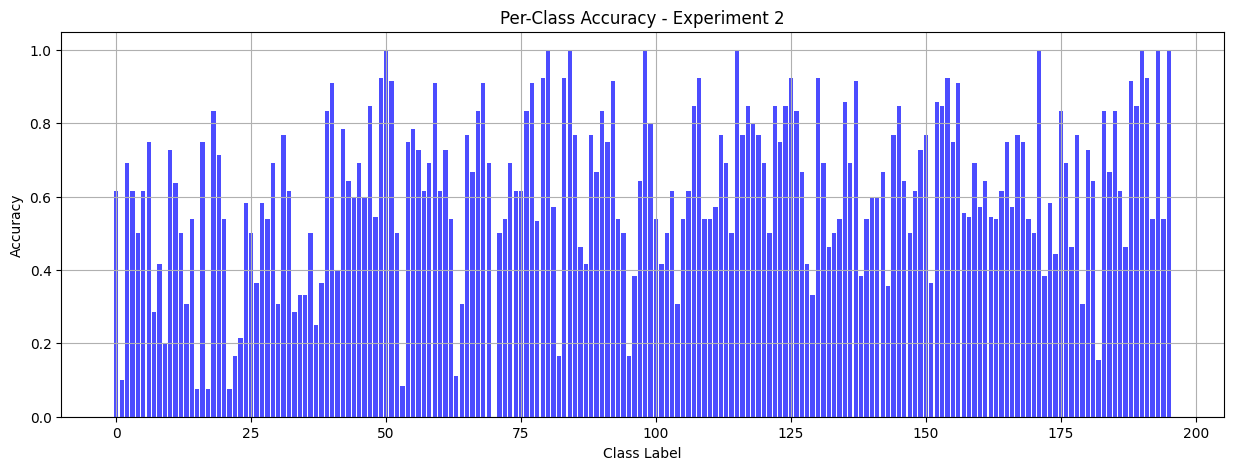

Training complete for Experiment 2!
Final training accuracy: 0.51%
Final validation accuracy: 0.63%
Final training precision: 0.5084
Final validation precision: 0.6627
Final training recall: 0.5110
Final validation recall: 0.6237
Final training F1 score: 0.5058
Final validation F1 score: 0.6157
time: 24.6 s (started: 2025-03-20 16:24:44 +00:00)


In [ ]:
import matplotlib.pyplot as plt


plt.figure(figsize=(10, 5))
plt.plot(train_losses_2B, label="Training Loss", color="blue", linestyle='-')
plt.plot(val_losses_2B, label="Validation Loss", color="red", linestyle='--')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Training and Validation Loss - Experiment 2")
plt.legend()
plt.grid(True)
plt.show()


plt.figure(figsize=(10, 5))
plt.plot(train_accs_2B, label="Training Accuracy", color="green", linestyle='-')
plt.plot(val_accs_2B, label="Validation Accuracy", color="orange", linestyle='--')
plt.xlabel("Epochs")
plt.ylabel("Accuracy (%)")
plt.title("Training and Validation Accuracy - Experiment 2")
plt.legend()
plt.grid(True)
plt.show()


plt.figure(figsize=(10, 5))
plt.plot(train_precisions_2B, label="Training Precision", color="purple", linestyle='-')
plt.plot(val_precisions_2B, label="Validation Precision", color="brown", linestyle='--')
plt.xlabel("Epochs")
plt.ylabel("Precision")
plt.title("Training and Validation Precision - Experiment 2")
plt.legend()
plt.grid(True)
plt.show()


plt.figure(figsize=(10, 5))
plt.plot(train_recalls_2B, label="Training Recall", color="cyan", linestyle='-')
plt.plot(val_recalls_2B, label="Validation Recall", color="magenta", linestyle='--')
plt.xlabel("Epochs")
plt.ylabel("Recall")
plt.title("Training and Validation Recall - Experiment 2")
plt.legend()
plt.grid(True)
plt.show()


plt.figure(figsize=(10, 5))
plt.plot(train_f1s_2B, label="Training F1 Score", color="black", linestyle='-')
plt.plot(val_f1s_2B, label="Validation F1 Score", color="gray", linestyle='--')
plt.xlabel("Epochs")
plt.ylabel("F1 Score")
plt.title("Training and Validation F1 Score - Experiment 2")
plt.legend()
plt.grid(True)
plt.show()


plt.figure(figsize=(10, 5))
learning_rates_2B = [LEARNING_RATE_2B * (0.5 ** (epoch // 5)) for epoch in range(len(train_losses_2B))]
plt.plot(range(len(train_losses_2B)), learning_rates_2B, label="Learning Rate", color="blue", linestyle='-')
plt.xlabel("Epochs")
plt.ylabel("Learning Rate")
plt.title("Learning Rate Schedule - Experiment 2")
plt.legend()
plt.grid(True)
plt.show()

all_preds_2B = []
all_labels_2B = []

model_2B.eval()
with torch.no_grad():
    for images, labels in val_loader:
        images, labels = images.to(device), labels.to(device)
        outputs = model_2B(images)
        _, preds = torch.max(outputs, 1)

        all_preds_2B.extend(preds.cpu().numpy())
        all_labels_2B.extend(labels.cpu().numpy())


conf_matrix_2B = confusion_matrix(all_labels_2B, all_preds_2B)


plt.figure(figsize=(12, 8))
sns.heatmap(conf_matrix_2B, annot=False, cmap="Blues", fmt="d", linewidths=0.5)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix - Experiment 2")
plt.show()


num_classes = NUM_CLASSES_2B
class_accuracies_2B = np.diag(conf_matrix_2B) / np.sum(conf_matrix_2B, axis=1)


plt.figure(figsize=(15, 5))
plt.bar(range(num_classes), class_accuracies_2B, color="blue", alpha=0.7)
plt.xlabel("Class Label")
plt.ylabel("Accuracy")
plt.title("Per-Class Accuracy - Experiment 2")
plt.grid(True)
plt.show()


print("Training complete for Experiment 2!")
print(f"Final training accuracy: {train_accs_2B[-1]:.2f}%")
print(f"Final validation accuracy: {val_accs_2B[-1]:.2f}%")
print(f"Final training precision: {train_precisions_2B[-1]:.4f}")
print(f"Final validation precision: {val_precisions_2B[-1]:.4f}")
print(f"Final training recall: {train_recalls_2B[-1]:.4f}")
print(f"Final validation recall: {val_recalls_2B[-1]:.4f}")
print(f"Final training F1 score: {train_f1s_2B[-1]:.4f}")
print(f"Final validation F1 score: {val_f1s_2B[-1]:.4f}")


## **Experiment 2 - Evaluate the Augmented Model on Test Data**

This code evaluates the performance of a trained model on a test dataset using PyTorch. It calculates the test loss, Top-1 accuracy, and Top-5 accuracy. The model's predictions are obtained using softmax probabilities, and the accuracy metrics are computed using `accuracy_score` and `top_k_accuracy_score` from scikit-learn. This evaluation provides insight into how well the model generalizes to unseen data, especially after applying data augmentation during training.

In [ ]:
import numpy as np
from sklearn.metrics import accuracy_score, top_k_accuracy_score
import torch

model.eval()

all_predictions = []
all_true_labels = []

test_loss = 0.0
total_samples = 0

with torch.no_grad():
    for images, labels in test_loader:
        images, labels = images.to(device), labels.to(device)

        outputs = model(images)
        loss = criterion(outputs, labels)
        probabilities = torch.nn.functional.softmax(outputs, dim=1).cpu().numpy()
        predicted_classes = np.argmax(probabilities, axis=1)

        test_loss += loss.item() * images.size(0)
        total_samples += labels.size(0)

        all_predictions.extend(probabilities)
        all_true_labels.extend(labels.cpu().numpy())

test_loss /= total_samples
augmented_model_test_loss=test_loss

all_predictions = np.array(all_predictions)
all_true_labels = np.array(all_true_labels)

augmented_model_test_accuracy = accuracy_score(all_true_labels, np.argmax(all_predictions, axis=1))

augmented_model_top_5_accuracy = top_k_accuracy_score(all_true_labels, all_predictions, k=5)

print(f"Augmented Model - Test Accuracy (Top-1): {augmented_model_test_accuracy:.4f} %")
print(f"Augmented Model - Top-5 Accuracy: {augmented_model_top_5_accuracy:.4f} %")
print(f"Augmented Model - Test Loss: {augmented_model_test_loss:.4f}")


Augmented Model - Test Accuracy (Top-1): 0.0047 %
Augmented Model - Top-5 Accuracy: 0.0214 %
Augmented Model - Test Loss: 7.3476
time: 1min 12s (started: 2025-03-20 16:25:36 +00:00)


**Saving the model_augmented Model**

In [ ]:
torch.save(model.state_dict(), 'model_augmented_resnet50.pth')
print("Model saved as: model_augmented_resnet50.pth")


Model saved as: model_augmented_resnet50.pth
time: 24.6 ms (started: 2025-03-20 16:27:23 +00:00)


## **Prepare the Third Model (Fine-Tuned Model)**

This code defines a fine-tuned version of the MobileNetV2 model for classifying 196 car classes using PyTorch. The base MobileNetV2 model is used as a feature extractor, freezing the initial layers to retain pre-trained knowledge while allowing the later layers to learn task-specific features. Additional fully connected layers with Batch Normalization and Dropout are added to improve generalization and reduce overfitting. The model is optimized using the Adam optimizer with CrossEntropyLoss, and a learning rate scheduler (ReduceLROnPlateau) is implemented to adjust the learning rate dynamically. Key hyperparameters were chosen based on a balance between stability and adaptability: a learning rate of 0.001 to ensure smooth convergence, dropout values (0.4 and 0.3) to mitigate overfitting, and early stopping with patience of 5 epochs to prevent unnecessary training on stagnant performance. This approach balances leveraging pre-trained knowledge with fine-tuning for better classification accuracy.

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import models
from sklearn.metrics import precision_score, recall_score, f1_score
import copy
import warnings
warnings.filterwarnings("ignore")

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")


EPOCHS_3 = 10
LEARNING_RATE_3 = 0.001
PATIENCE_3 = 5
NUM_CLASSES_3 = 196


base_model_finetune = models.mobilenet_v2(pretrained=True)
base_model_finetune = base_model_finetune.features


for layer in list(base_model_finetune.children())[:10]:
    for param in layer.parameters():
        param.requires_grad = False


for layer in list(base_model_finetune.children())[10:]:
    for param in layer.parameters():
        param.requires_grad = True


class MobileNetV2Custom(nn.Module):
    def __init__(self, base_model, num_classes=NUM_CLASSES_3):
        super(MobileNetV2Custom, self).__init__()
        self.base_model = base_model
        self.global_pool = nn.AdaptiveAvgPool2d((1, 1))
        self.flatten = nn.Flatten()
        self.batch_norm1 = nn.BatchNorm1d(1280)
        self.fc1 = nn.Linear(1280, 256)
        self.relu = nn.ReLU()
        self.dropout1 = nn.Dropout(0.4)
        self.fc2 = nn.Linear(256, 128)
        self.dropout2 = nn.Dropout(0.3)
        self.output_layer = nn.Linear(128, num_classes)

    def forward(self, x):
        x = self.base_model(x)
        x = self.global_pool(x)
        x = self.flatten(x)
        x = self.batch_norm1(x)
        x = self.fc1(x)
        x = self.relu(x)
        x = self.dropout1(x)
        x = self.fc2(x)
        x = self.relu(x)
        x = self.dropout2(x)
        x = self.output_layer(x)
        return x


model_finetuned_3 = MobileNetV2Custom(base_model_finetune).to(device)


criterion_3 = nn.CrossEntropyLoss()
optimizer_3 = optim.Adam(model_finetuned_3.parameters(), lr=LEARNING_RATE_3)
scheduler_3 = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer_3, mode='min', factor=0.5, patience=3, verbose=True)


train_losses_3 = []
val_losses_3 = []
train_accs_3 = []
val_accs_3 = []
train_precisions_3 = []
val_precisions_3 = []
train_recalls_3 = []
val_recalls_3 = []
train_f1s_3 = []
val_f1s_3 = []


def train_one_epoch_3(model, train_loader, criterion, optimizer, device):
    model.train()
    running_loss = 0.0
    correct_predictions = 0
    total_samples = 0
    all_labels = []
    all_preds = []

    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)
        optimizer.zero_grad()

        outputs = model(images)
        loss = criterion(outputs, labels)

        loss.backward()
        optimizer.step()

        running_loss += loss.item() * images.size(0)
        _, preds = torch.max(outputs, 1)
        correct_predictions += torch.sum(preds == labels).item()
        total_samples += labels.size(0)

        all_labels.extend(labels.cpu().numpy())
        all_preds.extend(preds.cpu().numpy())

    epoch_loss = running_loss / total_samples
    epoch_acc = correct_predictions / total_samples
    epoch_precision = precision_score(all_labels, all_preds, average='macro')
    epoch_recall = recall_score(all_labels, all_preds, average='macro')
    epoch_f1 = f1_score(all_labels, all_preds, average='macro')

    return epoch_loss, epoch_acc, epoch_precision, epoch_recall, epoch_f1


def validate_3(model, val_loader, criterion, device):
    model.eval()
    running_loss = 0.0
    correct_predictions = 0
    total_samples = 0
    all_labels = []
    all_preds = []

    with torch.no_grad():
        for images, labels in val_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            loss = criterion(outputs, labels)

            running_loss += loss.item() * images.size(0)
            _, preds = torch.max(outputs, 1)
            correct_predictions += torch.sum(preds == labels).item()
            total_samples += labels.size(0)

            all_labels.extend(labels.cpu().numpy())
            all_preds.extend(preds.cpu().numpy())

    val_loss = running_loss / total_samples
    val_acc = correct_predictions / total_samples
    val_precision = precision_score(all_labels, all_preds, average='macro')
    val_recall = recall_score(all_labels, all_preds, average='macro')
    val_f1 = f1_score(all_labels, all_preds, average='macro')

    return val_loss, val_acc, val_precision, val_recall, val_f1


best_val_loss_3 = float('inf')
best_model_weights_3 = copy.deepcopy(model_finetuned_3.state_dict())
patience_counter_3 = 0

for epoch in range(EPOCHS_3):
    print(f"\n🔹 Epoch {epoch+1}/{EPOCHS_3}")

    train_loss, train_acc, train_prec, train_rec, train_f1 = train_one_epoch_3(model_finetuned_3, train_loader, criterion_3, optimizer_3, device)
    val_loss, val_acc, val_prec, val_rec, val_f1 = validate_3(model_finetuned_3, val_loader, criterion_3, device)


    train_losses_3.append(train_loss)
    val_losses_3.append(val_loss)
    train_accs_3.append(train_acc)
    val_accs_3.append(val_acc)
    train_precisions_3.append(train_prec)
    val_precisions_3.append(val_prec)
    train_recalls_3.append(train_rec)
    val_recalls_3.append(val_rec)
    train_f1s_3.append(train_f1)
    val_f1s_3.append(val_f1)


    print(f"Training:    Loss: {train_loss:.4f}, Accuracy: {train_acc:.2f}%, Precision: {train_prec:.4f}, Recall: {train_rec:.4f}, F1 Score: {train_f1:.4f}")
    print(f"Validation:  Loss: {val_loss:.4f}, Accuracy: {val_acc:.2f}%, Precision: {val_prec:.4f}, Recall: {val_rec:.4f}, F1 Score: {val_f1:.4f}")


    if val_loss < best_val_loss_3:
        best_val_loss_3 = val_loss
        best_model_weights_3 = copy.deepcopy(model_finetuned_3.state_dict())
        patience_counter_3 = 0
    else:
        patience_counter_3 += 1

    if patience_counter_3 >= PATIENCE_3:
        print("Early stopping triggered!")
        break


model_finetuned_3.load_state_dict(best_model_weights_3)
print("Training complete with Early Stopping!")


Using device: cuda

🔹 Epoch 1/10
Training:    Loss: 5.3243, Accuracy: 0.00%, Precision: 0.0019, Recall: 0.0042, F1 Score: 0.0022
Validation:  Loss: 5.2762, Accuracy: 0.01%, Precision: 0.0005, Recall: 0.0057, F1 Score: 0.0009

🔹 Epoch 2/10
Training:    Loss: 5.2898, Accuracy: 0.01%, Precision: 0.0032, Recall: 0.0049, F1 Score: 0.0022
Validation:  Loss: 5.2781, Accuracy: 0.01%, Precision: 0.0000, Recall: 0.0051, F1 Score: 0.0001

🔹 Epoch 3/10
Training:    Loss: 5.2845, Accuracy: 0.01%, Precision: 0.0001, Recall: 0.0039, F1 Score: 0.0002
Validation:  Loss: 5.2778, Accuracy: 0.01%, Precision: 0.0000, Recall: 0.0051, F1 Score: 0.0001

🔹 Epoch 4/10
Training:    Loss: 5.2825, Accuracy: 0.01%, Precision: 0.0007, Recall: 0.0048, F1 Score: 0.0009
Validation:  Loss: 5.2768, Accuracy: 0.01%, Precision: 0.0000, Recall: 0.0051, F1 Score: 0.0001

🔹 Epoch 5/10
Training:    Loss: 5.2817, Accuracy: 0.01%, Precision: 0.0002, Recall: 0.0049, F1 Score: 0.0003
Validation:  Loss: 5.2768, Accuracy: 0.01%, Pre

## **Evaluation of the Fine-Tuned Model**
This code evaluates the performance of the fine-tuned model by visualizing key training and validation metrics. It includes loss, accuracy, precision, recall, and F1-score trends over epochs, helping to analyze model convergence and generalization. Additionally, it presents a confusion matrix to examine misclassification patterns and a per-class accuracy plot to assess performance across different categories. The learning rate schedule is also displayed to track its impact on training. These visualizations provide a comprehensive performance analysis, aiding in hyperparameter tuning and model optimization.

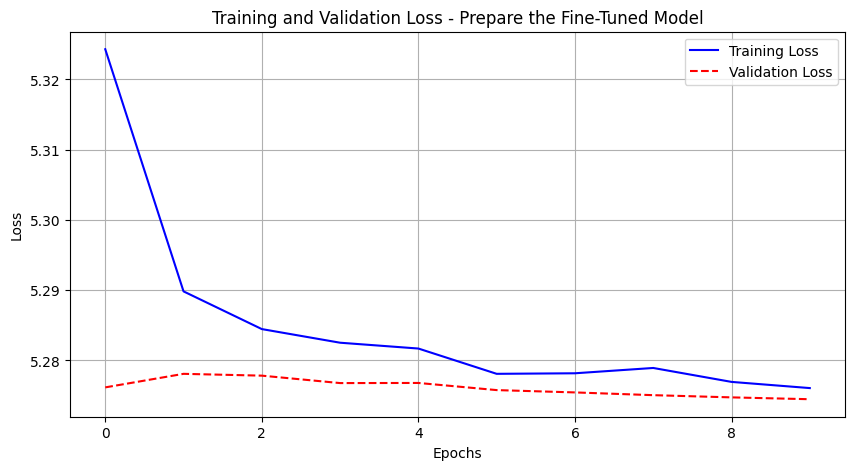

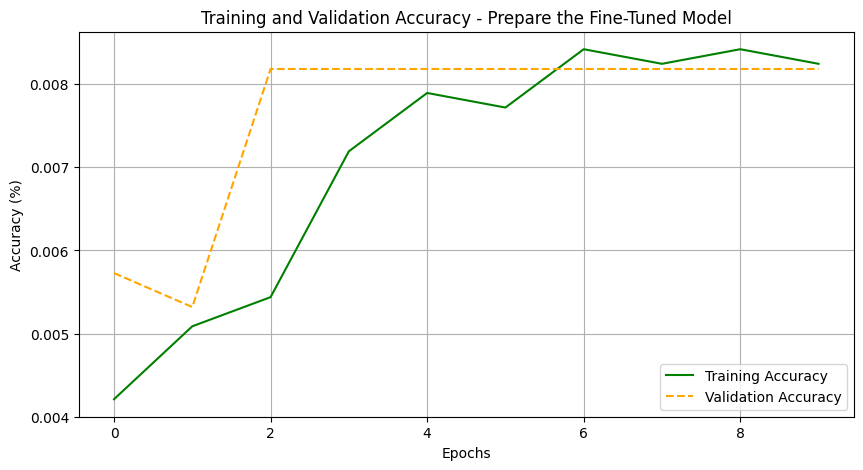

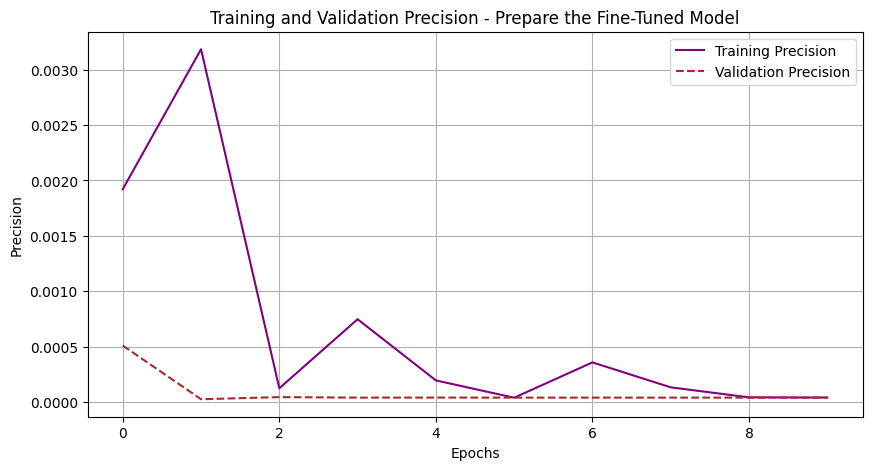

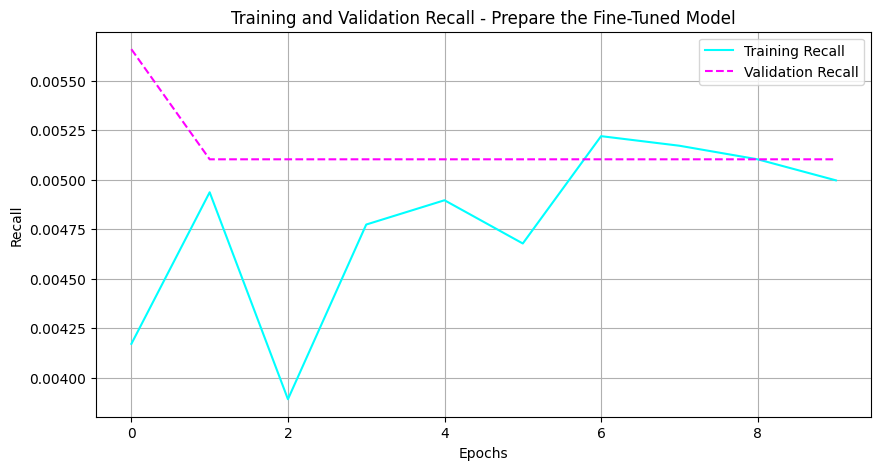

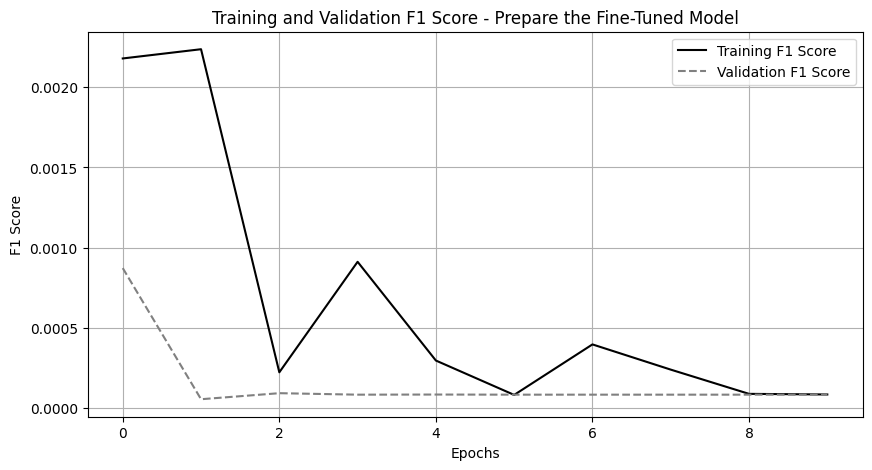

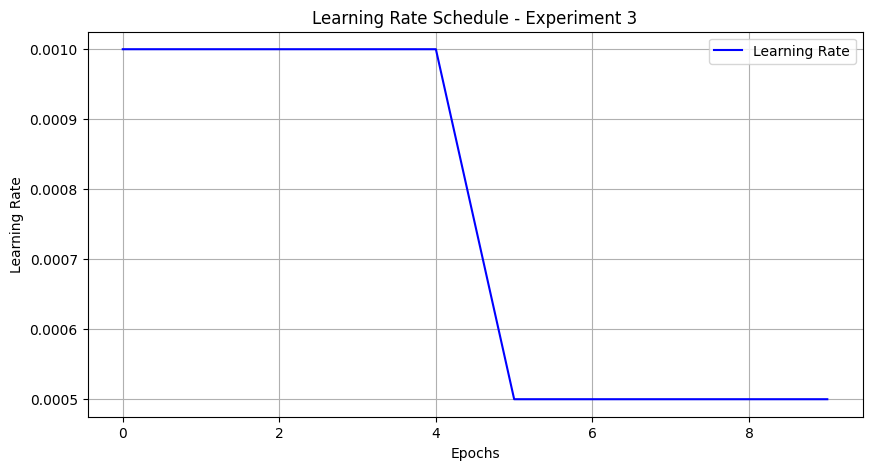

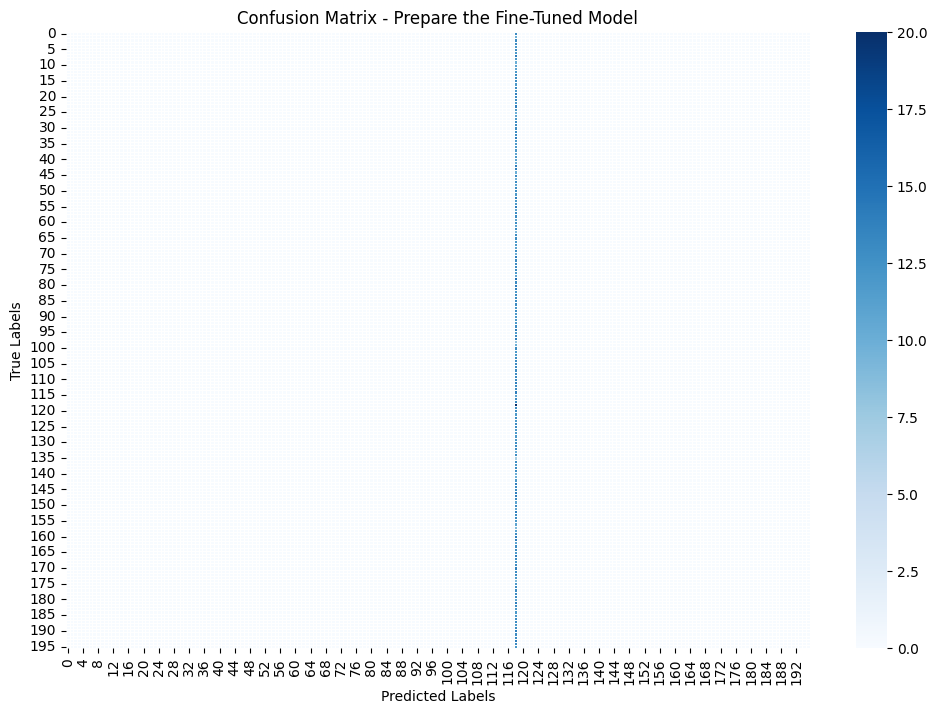

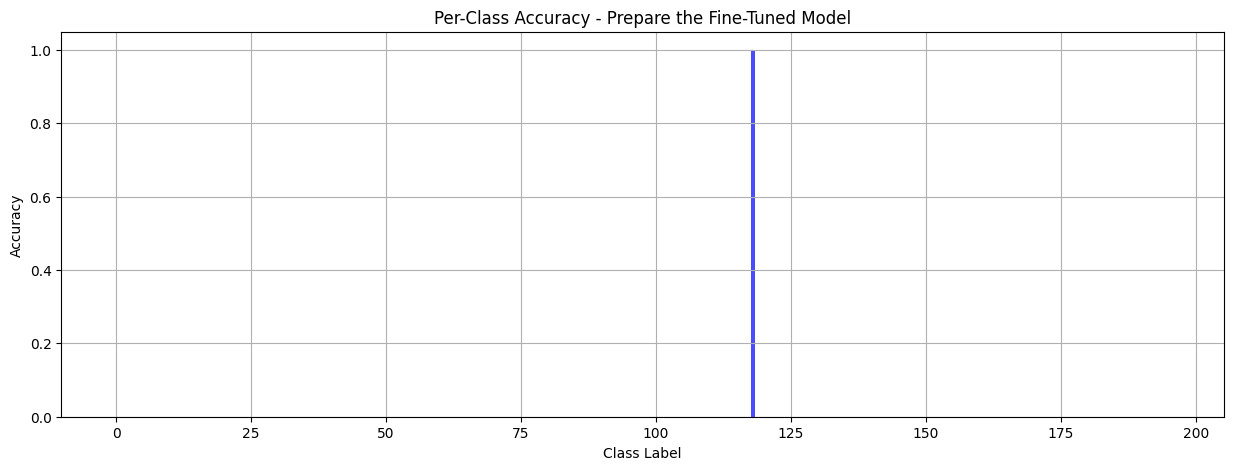

Training complete for Experiment 3!
Final training accuracy: 0.01%
Final validation accuracy: 0.01%
Final training precision: 0.0000
Final validation precision: 0.0000
Final training recall: 0.0050
Final validation recall: 0.0051
Final training F1 score: 0.0001
Final validation F1 score: 0.0001
time: 23.8 s (started: 2025-03-20 16:47:02 +00:00)


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
import numpy as np


plt.figure(figsize=(10, 5))
plt.plot(train_losses_3, label="Training Loss", color="blue", linestyle='-')
plt.plot(val_losses_3, label="Validation Loss", color="red", linestyle='--')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Training and Validation Loss - Prepare the Fine-Tuned Model")
plt.legend()
plt.grid(True)
plt.show()


plt.figure(figsize=(10, 5))
plt.plot(train_accs_3, label="Training Accuracy", color="green", linestyle='-')
plt.plot(val_accs_3, label="Validation Accuracy", color="orange", linestyle='--')
plt.xlabel("Epochs")
plt.ylabel("Accuracy (%)")
plt.title("Training and Validation Accuracy - Prepare the Fine-Tuned Model")
plt.legend()
plt.grid(True)
plt.show()


plt.figure(figsize=(10, 5))
plt.plot(train_precisions_3, label="Training Precision", color="purple", linestyle='-')
plt.plot(val_precisions_3, label="Validation Precision", color="brown", linestyle='--')
plt.xlabel("Epochs")
plt.ylabel("Precision")
plt.title("Training and Validation Precision - Prepare the Fine-Tuned Model")
plt.legend()
plt.grid(True)
plt.show()


plt.figure(figsize=(10, 5))
plt.plot(train_recalls_3, label="Training Recall", color="cyan", linestyle='-')
plt.plot(val_recalls_3, label="Validation Recall", color="magenta", linestyle='--')
plt.xlabel("Epochs")
plt.ylabel("Recall")
plt.title("Training and Validation Recall - Prepare the Fine-Tuned Model")
plt.legend()
plt.grid(True)
plt.show()


plt.figure(figsize=(10, 5))
plt.plot(train_f1s_3, label="Training F1 Score", color="black", linestyle='-')
plt.plot(val_f1s_3, label="Validation F1 Score", color="gray", linestyle='--')
plt.xlabel("Epochs")
plt.ylabel("F1 Score")
plt.title("Training and Validation F1 Score - Prepare the Fine-Tuned Model")
plt.legend()
plt.grid(True)
plt.show()


plt.figure(figsize=(10, 5))
learning_rates_3 = [LEARNING_RATE_3 * (0.5 ** (epoch // 5)) for epoch in range(len(train_losses_3))]
plt.plot(range(len(train_losses_3)), learning_rates_3, label="Learning Rate", color="blue", linestyle='-')
plt.xlabel("Epochs")
plt.ylabel("Learning Rate")
plt.title("Learning Rate Schedule - Experiment 3")
plt.legend()
plt.grid(True)
plt.show()


all_preds_3 = []
all_labels_3 = []

model_finetuned_3.eval()
with torch.no_grad():
    for images, labels in val_loader:
        images, labels = images.to(device), labels.to(device)
        outputs = model_finetuned_3(images)
        _, preds = torch.max(outputs, 1)

        all_preds_3.extend(preds.cpu().numpy())
        all_labels_3.extend(labels.cpu().numpy())


conf_matrix_3 = confusion_matrix(all_labels_3, all_preds_3)


plt.figure(figsize=(12, 8))
sns.heatmap(conf_matrix_3, annot=False, cmap="Blues", fmt="d", linewidths=0.5)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix - Prepare the Fine-Tuned Model")
plt.show()


num_classes = NUM_CLASSES_3
class_accuracies_3 = np.diag(conf_matrix_3) / np.sum(conf_matrix_3, axis=1)

plt.figure(figsize=(15, 5))
plt.bar(range(num_classes), class_accuracies_3, color="blue", alpha=0.7)
plt.xlabel("Class Label")
plt.ylabel("Accuracy")
plt.title("Per-Class Accuracy - Prepare the Fine-Tuned Model")
plt.grid(True)
plt.show()


print("Training complete for Experiment 3!")
print(f"Final training accuracy: {train_accs_3[-1]:.2f}%")
print(f"Final validation accuracy: {val_accs_3[-1]:.2f}%")
print(f"Final training precision: {train_precisions_3[-1]:.4f}")
print(f"Final validation precision: {val_precisions_3[-1]:.4f}")
print(f"Final training recall: {train_recalls_3[-1]:.4f}")
print(f"Final validation recall: {val_recalls_3[-1]:.4f}")
print(f"Final training F1 score: {train_f1s_3[-1]:.4f}")
print(f"Final validation F1 score: {val_f1s_3[-1]:.4f}")


 **Data Augmentation and Data Preparation**

This code prepares the data pipeline for fine-tuning a MobileNetV2 model using PyTorch, applying advanced data augmentation techniques to improve model generalization and robustness. The `train_transforms_finetune` pipeline includes transformations such as random cropping, rotation, flipping, color jitter, and perspective changes, enhancing the model's ability to learn invariant features. The validation set uses simpler transformations to preserve the original image distribution for accurate performance evaluation. The data is loaded into PyTorch DataLoaders for efficient mini-batch processing. These augmentations are crucial for preventing overfitting and boosting classification accuracy in the fine-tuning process.

In [ ]:
from torchvision import transforms
from torch.utils.data import DataLoader, Dataset
from PIL import Image

train_transforms_finetune = transforms.Compose([
    transforms.RandomResizedCrop(224, scale=(0.5, 1.5)),
    transforms.RandomRotation(30),
    transforms.RandomHorizontalFlip(),
    transforms.RandomVerticalFlip(),
    transforms.ColorJitter(brightness=0.5, contrast=0.5, saturation=0.5, hue=0.2),
    transforms.RandomAffine(degrees=30, translate=(0.2, 0.2), shear=0.25),
    transforms.RandomPerspective(distortion_scale=0.2, p=0.5),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
])

val_transforms = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
])

class CustomDataset(Dataset):
    def __init__(self, dataframe, image_dir, transform=None):
        self.dataframe = dataframe
        self.image_dir = image_dir
        self.transform = transform

    def __len__(self):
        return len(self.dataframe)

    def __getitem__(self, idx):
        image_name = self.dataframe.iloc[idx]['image']
        image_path = f"{self.image_dir}/{image_name}"
        image = Image.open(image_path).convert('RGB')
        label = int(self.dataframe.iloc[idx]['class']) - 1

        if self.transform:
            image = self.transform(image)

        return image, label

train_dataset_finetune = CustomDataset(
    dataframe=train_df,
    image_dir=TRAIN_IMAGE_PATH,
    transform=train_transforms_finetune
)

train_loader_finetune = DataLoader(
    train_dataset_finetune,
    batch_size=128,
    shuffle=True,
    num_workers=4
)

val_dataset = CustomDataset(
    dataframe=val_df,
    image_dir=TRAIN_IMAGE_PATH,
    transform=val_transforms
)

val_loader = DataLoader(
    val_dataset,
    batch_size=128,
    shuffle=False,
    num_workers=4
)

print(f"Training images before augmentation: {len(train_dataset_finetune)}")
print(f"Validation images: {len(val_dataset)}")


Training images before augmentation: 5700
Validation images: 2444
time: 2.48 ms (started: 2025-03-20 16:47:36 +00:00)


##**Experiment 3 - Load, Compile & Train Fine-Tuned Model with Data Augmentation**

This code fine-tunes a MobileNetV2-based neural network using PyTorch, optimizing classification performance with CrossEntropyLoss and the Adam optimizer. A learning rate scheduler (ReduceLROnPlateau) adjusts the learning rate dynamically based on validation loss trends, improving convergence. The training loop monitors loss, accuracy, precision, recall, and F1-score, saving the best model weights. Early stopping is implemented to prevent overfitting, ensuring stability and efficiency in training.

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from tqdm import tqdm
import copy
import warnings
from sklearn.metrics import precision_score, recall_score, f1_score
warnings.filterwarnings("ignore")

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

EPOCHS_3 = 20
LEARNING_RATE_3 = 0.001
PATIENCE_3 = 10

criterion_3 = nn.CrossEntropyLoss()
optimizer_3 = optim.Adam(model.parameters(), lr=LEARNING_RATE_3)
scheduler_3 = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer_3, mode='min', factor=0.5, patience=3, verbose=True)

best_val_loss_3 = float('inf')
best_model_weights_3 = copy.deepcopy(model.state_dict())
patience_counter_3 = 0


train_losses_3 = []
val_losses_3 = []
train_accs_3 = []
val_accs_3 = []
train_precisions_3 = []
val_precisions_3 = []
train_recalls_3 = []
val_recalls_3 = []
train_f1s_3 = []
val_f1s_3 = []

def train_one_epoch_3(model, train_loader, criterion, optimizer, device):
    model.train()
    running_loss = 0.0
    correct = 0
    total = 0
    all_labels = []
    all_preds = []

    for images, labels in tqdm(train_loader, desc="Training"):
        images, labels = images.to(device), labels.to(device)

        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item() * images.size(0)
        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

        all_labels.extend(labels.cpu().numpy())
        all_preds.extend(predicted.cpu().numpy())

    epoch_loss_3 = running_loss / len(train_loader.dataset)
    epoch_acc_3 = 100 * correct / total


    epoch_precision_3 = precision_score(all_labels, all_preds, average='macro')
    epoch_recall_3 = recall_score(all_labels, all_preds, average='macro')
    epoch_f1_3 = f1_score(all_labels, all_preds, average='macro')

    return epoch_loss_3, epoch_acc_3, epoch_precision_3, epoch_recall_3, epoch_f1_3

def validate_3(model, val_loader, criterion, device):
    model.eval()
    running_loss = 0.0
    correct = 0
    total = 0
    all_labels = []
    all_preds = []

    with torch.no_grad():
        for images, labels in tqdm(val_loader, desc="Validating"):
            images, labels = images.to(device), labels.to(device)

            outputs = model(images)
            loss = criterion(outputs, labels)

            running_loss += loss.item() * images.size(0)
            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

            all_labels.extend(labels.cpu().numpy())
            all_preds.extend(predicted.cpu().numpy())

    val_loss_3 = running_loss / len(val_loader.dataset)
    val_acc_3 = 100 * correct / total


    val_precision_3 = precision_score(all_labels, all_preds, average='macro')
    val_recall_3 = recall_score(all_labels, all_preds, average='macro')
    val_f1_3 = f1_score(all_labels, all_preds, average='macro')

    return val_loss_3, val_acc_3, val_precision_3, val_recall_3, val_f1_3


for epoch in range(EPOCHS_3):
    print(f"\n🔹 Epoch {epoch+1}/{EPOCHS_3}")

    train_loss_3, train_acc_3, train_prec_3, train_rec_3, train_f1_3 = train_one_epoch_3(model, train_loader_finetune, criterion_3, optimizer_3, device)
    val_loss_3, val_acc_3, val_prec_3, val_rec_3, val_f1_3 = validate_3(model, val_loader, criterion_3, device)


    train_losses_3.append(train_loss_3)
    val_losses_3.append(val_loss_3)
    train_accs_3.append(train_acc_3)
    val_accs_3.append(val_acc_3)
    train_precisions_3.append(train_prec_3)
    val_precisions_3.append(val_prec_3)
    train_recalls_3.append(train_rec_3)
    val_recalls_3.append(val_rec_3)
    train_f1s_3.append(train_f1_3)
    val_f1s_3.append(val_f1_3)

    print(f" Training:    Loss: {train_loss_3:.4f}, Accuracy: {train_acc_3:.2f}%, Precision: {train_prec_3:.4f}, Recall: {train_rec_3:.4f}, F1 Score: {train_f1_3:.4f}")
    print(f" Validation:  Loss: {val_loss_3:.4f}, Accuracy: {val_acc_3:.2f}%, Precision: {val_prec_3:.4f}, Recall: {val_rec_3:.4f}, F1 Score: {val_f1_3:.4f}")

    scheduler_3.step(val_loss_3)

    if val_loss_3 < best_val_loss_3:
        best_val_loss_3 = val_loss_3
        best_model_weights_3 = copy.deepcopy(model.state_dict())
        patience_counter_3 = 0
        print("New best model found and saved!")
    else:
        patience_counter_3 += 1
        print(f"Patience Counter: {patience_counter_3}/{PATIENCE_3}")

    if patience_counter_3 >= PATIENCE_3:
        print("🚨 Early stopping triggered!")
        break


model.load_state_dict(best_model_weights_3)
print("Fine-Tuned Model Training Complete!")



🔹 Epoch 1/20


Validating: 100%|██████████| 20/20 [00:17<00:00,  1.12it/s]


 Training:    Loss: 5.6050, Accuracy: 0.37%, Precision: 0.0021, Recall: 0.0035, F1 Score: 0.0020
 Validation:  Loss: 5.2811, Accuracy: 0.82%, Precision: 0.0019, Recall: 0.0080, F1 Score: 0.0020
New best model found and saved!

🔹 Epoch 2/20


Validating: 100%|██████████| 20/20 [00:17<00:00,  1.12it/s]


 Training:    Loss: 5.2818, Accuracy: 0.51%, Precision: 0.0058, Recall: 0.0050, F1 Score: 0.0030
 Validation:  Loss: 5.2715, Accuracy: 0.61%, Precision: 0.0007, Recall: 0.0060, F1 Score: 0.0010
New best model found and saved!

🔹 Epoch 3/20


Validating: 100%|██████████| 20/20 [00:19<00:00,  1.05it/s]


 Training:    Loss: 5.2748, Accuracy: 0.68%, Precision: 0.0024, Recall: 0.0066, F1 Score: 0.0024
 Validation:  Loss: 5.2654, Accuracy: 0.94%, Precision: 0.0018, Recall: 0.0082, F1 Score: 0.0022
New best model found and saved!

🔹 Epoch 4/20


Validating: 100%|██████████| 20/20 [00:18<00:00,  1.10it/s]


 Training:    Loss: 5.2699, Accuracy: 0.74%, Precision: 0.0038, Recall: 0.0069, F1 Score: 0.0032
 Validation:  Loss: 5.2523, Accuracy: 0.86%, Precision: 0.0035, Recall: 0.0082, F1 Score: 0.0020
New best model found and saved!

🔹 Epoch 5/20


Validating: 100%|██████████| 20/20 [00:18<00:00,  1.09it/s]


 Training:    Loss: 5.2607, Accuracy: 0.98%, Precision: 0.0020, Recall: 0.0085, F1 Score: 0.0024
 Validation:  Loss: 5.2367, Accuracy: 1.27%, Precision: 0.0004, Recall: 0.0100, F1 Score: 0.0007
New best model found and saved!

🔹 Epoch 6/20


Validating: 100%|██████████| 20/20 [00:19<00:00,  1.05it/s]


 Training:    Loss: 5.2304, Accuracy: 0.89%, Precision: 0.0030, Recall: 0.0081, F1 Score: 0.0032
 Validation:  Loss: 5.2892, Accuracy: 1.47%, Precision: 0.0023, Recall: 0.0120, F1 Score: 0.0020
Patience Counter: 1/10

🔹 Epoch 7/20


Validating: 100%|██████████| 20/20 [00:18<00:00,  1.10it/s]


 Training:    Loss: 5.2050, Accuracy: 1.14%, Precision: 0.0034, Recall: 0.0094, F1 Score: 0.0031
 Validation:  Loss: 5.1740, Accuracy: 1.60%, Precision: 0.0038, Recall: 0.0132, F1 Score: 0.0028
New best model found and saved!

🔹 Epoch 8/20


Validating: 100%|██████████| 20/20 [00:18<00:00,  1.09it/s]


 Training:    Loss: 5.1430, Accuracy: 1.02%, Precision: 0.0026, Recall: 0.0090, F1 Score: 0.0030
 Validation:  Loss: 5.1715, Accuracy: 1.23%, Precision: 0.0033, Recall: 0.0110, F1 Score: 0.0020
New best model found and saved!

🔹 Epoch 9/20


Validating: 100%|██████████| 20/20 [00:18<00:00,  1.08it/s]


 Training:    Loss: 5.0874, Accuracy: 1.35%, Precision: 0.0064, Recall: 0.0120, F1 Score: 0.0046
 Validation:  Loss: 5.0605, Accuracy: 1.55%, Precision: 0.0009, Recall: 0.0128, F1 Score: 0.0016
New best model found and saved!

🔹 Epoch 10/20


Validating: 100%|██████████| 20/20 [00:17<00:00,  1.12it/s]


 Training:    Loss: 5.0330, Accuracy: 1.67%, Precision: 0.0049, Recall: 0.0152, F1 Score: 0.0057
 Validation:  Loss: 5.0101, Accuracy: 2.21%, Precision: 0.0040, Recall: 0.0196, F1 Score: 0.0054
New best model found and saved!

🔹 Epoch 11/20


Validating: 100%|██████████| 20/20 [00:19<00:00,  1.05it/s]


 Training:    Loss: 4.9663, Accuracy: 1.81%, Precision: 0.0089, Recall: 0.0169, F1 Score: 0.0088
 Validation:  Loss: 4.9734, Accuracy: 1.96%, Precision: 0.0069, Recall: 0.0180, F1 Score: 0.0038
New best model found and saved!

🔹 Epoch 12/20


Validating: 100%|██████████| 20/20 [00:18<00:00,  1.11it/s]


 Training:    Loss: 4.9219, Accuracy: 1.72%, Precision: 0.0112, Recall: 0.0163, F1 Score: 0.0086
 Validation:  Loss: 4.8034, Accuracy: 2.54%, Precision: 0.0086, Recall: 0.0244, F1 Score: 0.0096
New best model found and saved!

🔹 Epoch 13/20


Validating: 100%|██████████| 20/20 [00:18<00:00,  1.05it/s]


 Training:    Loss: 4.8615, Accuracy: 1.93%, Precision: 0.0100, Recall: 0.0182, F1 Score: 0.0098
 Validation:  Loss: 4.7908, Accuracy: 2.74%, Precision: 0.0049, Recall: 0.0250, F1 Score: 0.0076
New best model found and saved!

🔹 Epoch 14/20


Validating: 100%|██████████| 20/20 [00:17<00:00,  1.12it/s]


 Training:    Loss: 4.8020, Accuracy: 2.42%, Precision: 0.0180, Recall: 0.0226, F1 Score: 0.0124
 Validation:  Loss: 4.6539, Accuracy: 2.82%, Precision: 0.0089, Recall: 0.0269, F1 Score: 0.0109
New best model found and saved!

🔹 Epoch 15/20


Validating: 100%|██████████| 20/20 [00:18<00:00,  1.07it/s]


 Training:    Loss: 4.7584, Accuracy: 2.63%, Precision: 0.0122, Recall: 0.0246, F1 Score: 0.0141
 Validation:  Loss: 4.9046, Accuracy: 2.62%, Precision: 0.0095, Recall: 0.0261, F1 Score: 0.0102
Patience Counter: 1/10

🔹 Epoch 16/20


Validating: 100%|██████████| 20/20 [00:18<00:00,  1.10it/s]


 Training:    Loss: 4.6952, Accuracy: 3.35%, Precision: 0.0200, Recall: 0.0314, F1 Score: 0.0198
 Validation:  Loss: 4.6133, Accuracy: 3.31%, Precision: 0.0205, Recall: 0.0320, F1 Score: 0.0163
New best model found and saved!

🔹 Epoch 17/20


Validating: 100%|██████████| 20/20 [00:17<00:00,  1.11it/s]


 Training:    Loss: 4.6621, Accuracy: 3.35%, Precision: 0.0224, Recall: 0.0322, F1 Score: 0.0214
 Validation:  Loss: 4.5526, Accuracy: 3.85%, Precision: 0.0231, Recall: 0.0391, F1 Score: 0.0220
New best model found and saved!

🔹 Epoch 18/20


Validating: 100%|██████████| 20/20 [00:19<00:00,  1.05it/s]


 Training:    Loss: 4.5980, Accuracy: 4.07%, Precision: 0.0296, Recall: 0.0392, F1 Score: 0.0243
 Validation:  Loss: 4.6742, Accuracy: 3.23%, Precision: 0.0171, Recall: 0.0316, F1 Score: 0.0149
Patience Counter: 1/10

🔹 Epoch 19/20


Validating: 100%|██████████| 20/20 [00:17<00:00,  1.11it/s]


 Training:    Loss: 4.5614, Accuracy: 4.04%, Precision: 0.0299, Recall: 0.0386, F1 Score: 0.0269
 Validation:  Loss: 4.9531, Accuracy: 4.01%, Precision: 0.0155, Recall: 0.0373, F1 Score: 0.0172
Patience Counter: 2/10

🔹 Epoch 20/20


Validating: 100%|██████████| 20/20 [00:18<00:00,  1.06it/s]

 Training:    Loss: 4.5493, Accuracy: 3.84%, Precision: 0.0254, Recall: 0.0360, F1 Score: 0.0240
 Validation:  Loss: 4.4210, Accuracy: 4.26%, Precision: 0.0189, Recall: 0.0404, F1 Score: 0.0187
New best model found and saved!
Fine-Tuned Model Training Complete!
time: 32min 6s (started: 2025-03-20 16:47:39 +00:00)


**Experiment 3 - Performance Visualization**

This code visualizes the training and validation performance of the **fine-tuned MobileNetV2 model with data augmentation**. It includes loss, accuracy, precision, recall, and F1-score graphs to assess convergence and potential overfitting. The learning rate schedule and confusion matrix provide additional insights into model behavior and misclassifications. These visualizations help evaluate the impact of fine-tuning and data augmentation on classification performance.

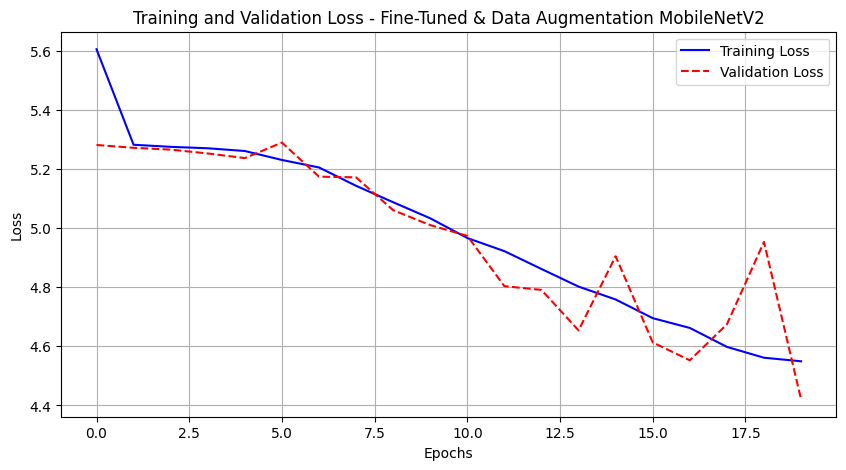

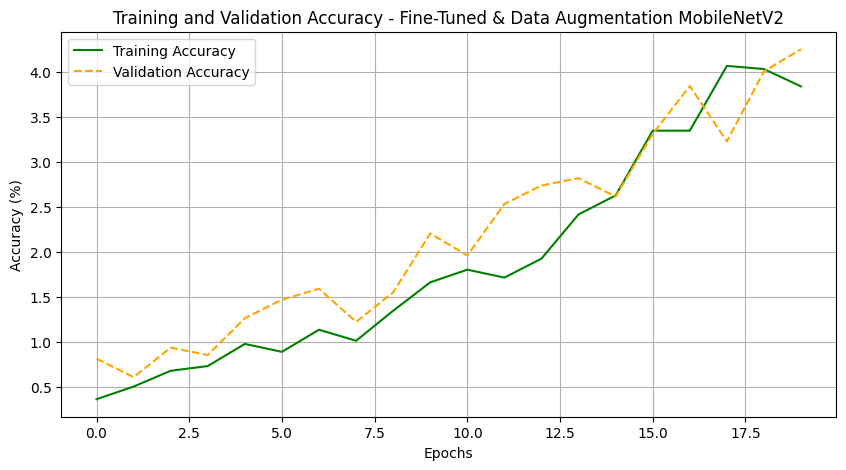

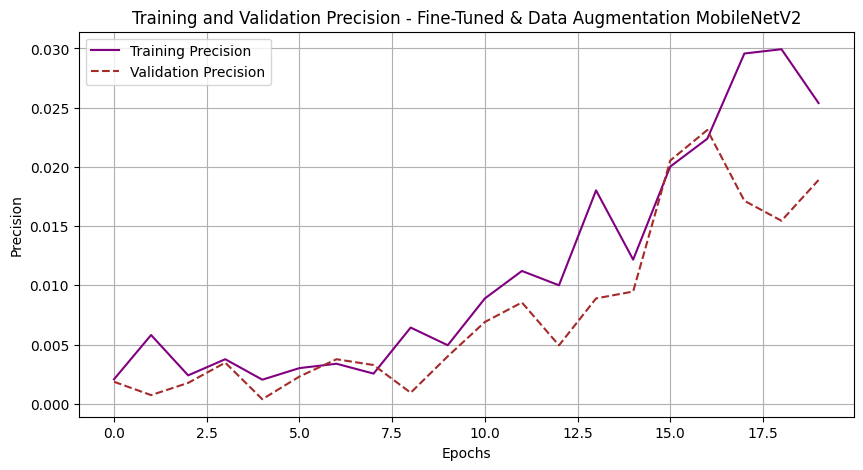

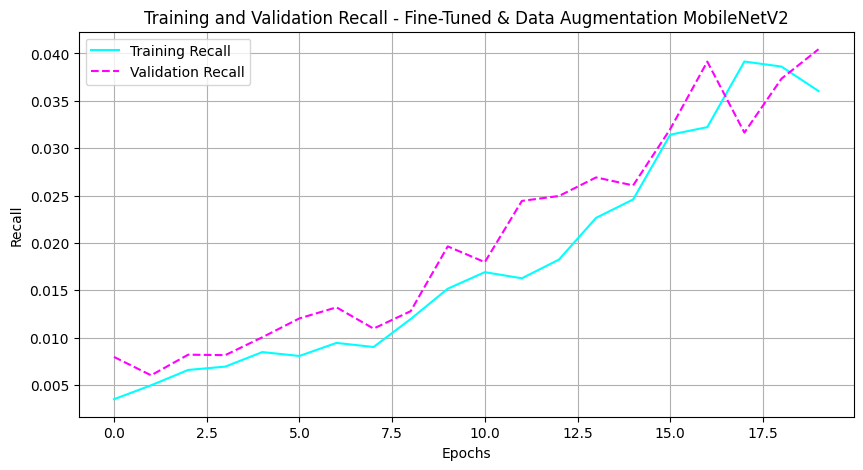

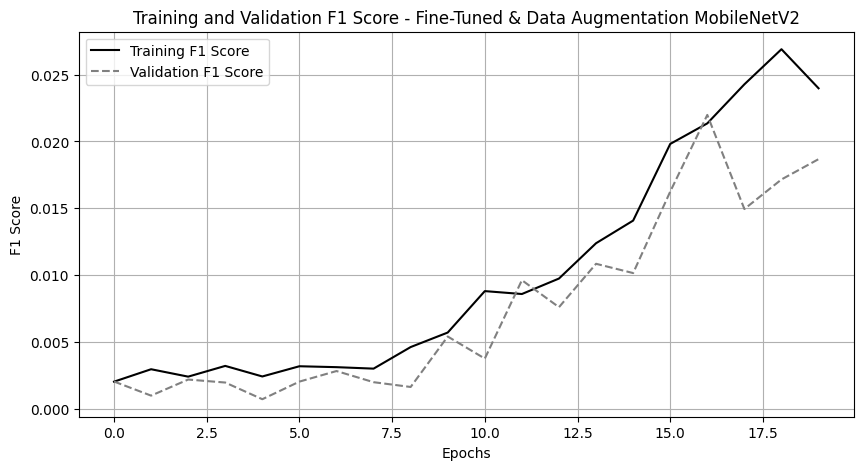

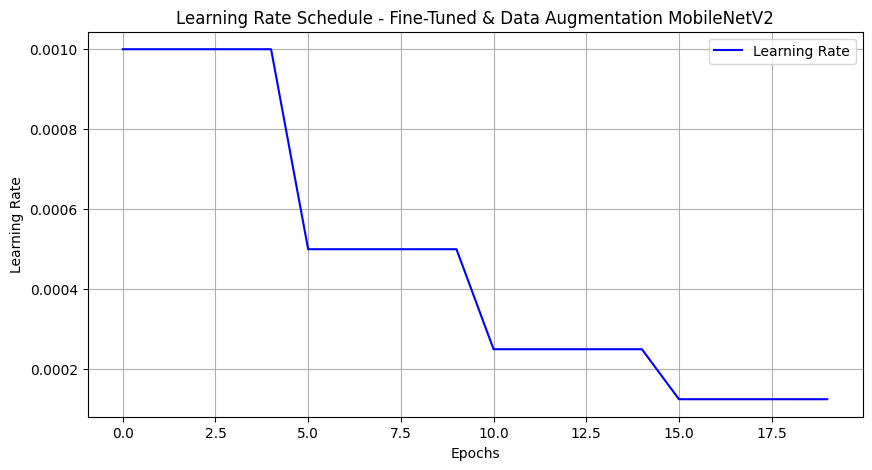

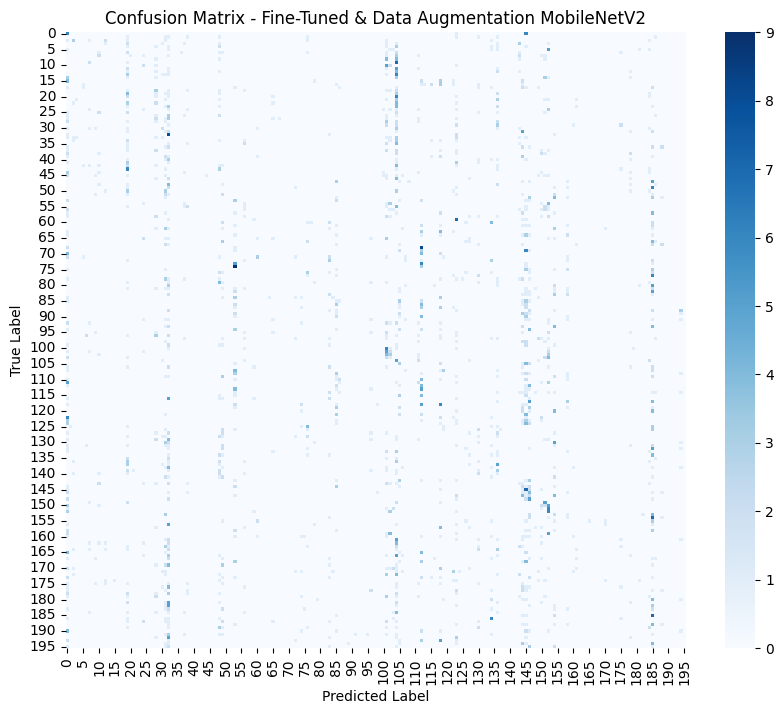

Final training accuracy: 3.84%
Final validation accuracy: 4.26%
Final training precision: 0.0254
Final validation precision: 0.0189
Final training recall: 0.0360
Final validation recall: 0.0404
Final training F1 score: 0.0240
Final validation F1 score: 0.0187
time: 20.3 s (started: 2025-03-20 17:19:52 +00:00)


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.metrics import confusion_matrix


plt.figure(figsize=(10, 5))
plt.plot(train_losses_3, label="Training Loss", color="blue", linestyle='-')
plt.plot(val_losses_3, label="Validation Loss", color="red", linestyle='--')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Training and Validation Loss - Fine-Tuned & Data Augmentation MobileNetV2")
plt.legend()
plt.grid(True)
plt.show()


plt.figure(figsize=(10, 5))
plt.plot(train_accs_3, label="Training Accuracy", color="green", linestyle='-')
plt.plot(val_accs_3, label="Validation Accuracy", color="orange", linestyle='--')
plt.xlabel("Epochs")
plt.ylabel("Accuracy (%)")
plt.title("Training and Validation Accuracy - Fine-Tuned & Data Augmentation MobileNetV2")
plt.legend()
plt.grid(True)
plt.show()


plt.figure(figsize=(10, 5))
plt.plot(train_precisions_3, label="Training Precision", color="purple", linestyle='-')
plt.plot(val_precisions_3, label="Validation Precision", color="brown", linestyle='--')
plt.xlabel("Epochs")
plt.ylabel("Precision")
plt.title("Training and Validation Precision - Fine-Tuned & Data Augmentation MobileNetV2")
plt.legend()
plt.grid(True)
plt.show()


plt.figure(figsize=(10, 5))
plt.plot(train_recalls_3, label="Training Recall", color="cyan", linestyle='-')
plt.plot(val_recalls_3, label="Validation Recall", color="magenta", linestyle='--')
plt.xlabel("Epochs")
plt.ylabel("Recall")
plt.title("Training and Validation Recall - Fine-Tuned & Data Augmentation MobileNetV2")
plt.legend()
plt.grid(True)
plt.show()


plt.figure(figsize=(10, 5))
plt.plot(train_f1s_3, label="Training F1 Score", color="black", linestyle='-')
plt.plot(val_f1s_3, label="Validation F1 Score", color="gray", linestyle='--')
plt.xlabel("Epochs")
plt.ylabel("F1 Score")
plt.title("Training and Validation F1 Score - Fine-Tuned & Data Augmentation MobileNetV2")
plt.legend()
plt.grid(True)
plt.show()


plt.figure(figsize=(10, 5))
learning_rates_3 = [LEARNING_RATE_3 * (0.5 ** (epoch // 5)) for epoch in range(len(train_losses_3))]
plt.plot(range(len(train_losses_3)), learning_rates_3, label="Learning Rate", color="blue", linestyle='-')
plt.xlabel("Epochs")
plt.ylabel("Learning Rate")
plt.title("Learning Rate Schedule - Fine-Tuned & Data Augmentation MobileNetV2")
plt.legend()
plt.grid(True)
plt.show()


def plot_confusion_matrix(model, dataloader, device):
    model.eval()
    all_labels = []
    all_preds = []

    with torch.no_grad():
        for images, labels in dataloader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            _, predicted = torch.max(outputs, 1)

            all_labels.extend(labels.cpu().numpy())
            all_preds.extend(predicted.cpu().numpy())

    cm = confusion_matrix(all_labels, all_preds)
    plt.figure(figsize=(10, 8))
    sns.heatmap(cm, annot=False, cmap="Blues", fmt="d")
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.title("Confusion Matrix - Fine-Tuned & Data Augmentation MobileNetV2")
    plt.show()


plot_confusion_matrix(model, val_loader, device)


print(f"Final training accuracy: {train_accs_3[-1]:.2f}%")
print(f"Final validation accuracy: {val_accs_3[-1]:.2f}%")
print(f"Final training precision: {train_precisions_3[-1]:.4f}")
print(f"Final validation precision: {val_precisions_3[-1]:.4f}")
print(f"Final training recall: {train_recalls_3[-1]:.4f}")
print(f"Final validation recall: {val_recalls_3[-1]:.4f}")
print(f"Final training F1 score: {train_f1s_3[-1]:.4f}")
print(f"Final validation F1 score: {val_f1s_3[-1]:.4f}")


**Evaluate the Fine-Tuned Model**

This code evaluates the fine-tuned model on the test set, calculating the test loss, Top-1 accuracy, and Top-5 accuracy. It provides a comprehensive assessment of the model's performance, ensuring reliable generalization to unseen data.

In [ ]:
import torch
from tqdm import tqdm

model.eval()
test_loss = 0.0
correct = 0
total = 0
top_5_correct = 0

with torch.no_grad():
    for images, labels in tqdm(test_loader, desc="Evaluating on Test Set"):
        images, labels = images.to(device), labels.to(device)

        outputs = model(images)
        loss = criterion(outputs, labels)

        test_loss += loss.item() * images.size(0)
        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

        _, top_5_pred = torch.topk(outputs, 5, dim=1)
        top_5_correct += torch.sum(top_5_pred.eq(labels.view(-1, 1)).sum(dim=1)).item()

test_loss /= len(test_loader.dataset)
fine_tuned_model_test_loss=test_loss
fine_tuned_model_test_acc = 100 * correct / total
fine_tuned_top_5_acc = 100 * top_5_correct / total

print(f"Fine-Tuned Model - Test Loss: {fine_tuned_model_test_loss:.4f}")
print(f"Fine-Tuned Model - Test Accuracy: {fine_tuned_model_test_acc:.2f}%")
print(f"Fine-Tuned Model - Top-5 Accuracy: {fine_tuned_top_5_acc:.2f}%")


Evaluating on Test Set: 100%|██████████| 252/252 [01:37<00:00,  2.59it/s]

Fine-Tuned Model - Test Loss: 4.4076
Fine-Tuned Model - Test Accuracy: 4.22%
Fine-Tuned Model - Top-5 Accuracy: 17.44%
time: 1min 37s (started: 2025-03-20 17:20:17 +00:00)


**Saving the Fine-Tuned Model**

In [ ]:
import torch


MODEL_WEIGHTS_PATH = "fine_tuned_weights_conf1.pth"


torch.save(model.state_dict(), MODEL_WEIGHTS_PATH)
print(f" Weights saved successfully at: {MODEL_WEIGHTS_PATH}")



torch.save({
    'model_state_dict': model.state_dict(),
    'base_model_state_dict': base_model.state_dict()
}, "fine_tuned_model_conf1.pth")

print("Model and base_model saved successfully as fine_tuned_model_conf1.pth!")



 Weights saved successfully at: fine_tuned_weights_conf1.pth
Model and base_model saved successfully as fine_tuned_model_conf1.pth!
time: 128 ms (started: 2025-03-20 17:46:02 +00:00)


**Compare Models Performance**

This code compares the performance of three models: Base Model (MobileNetV2), Augmented Model (MobileNetV2), and Fine-Tuned Model (MobileNetV2). The first graph presents the Top-1 accuracy, Top-5 accuracy, and test loss, allowing for a quick assessment of the model's effectiveness. The second and third graphs visualize the training vs. validation accuracy and loss over epochs, helping identify trends like overfitting or underfitting. Finally, a confusion matrix function is included for deeper analysis of model predictions. The printed summary at the end provides a numerical comparison of all models, highlighting key evaluation metrics. Additionally, a bar chart compares Precision, Recall, and F1 Score across the three experiments, providing a clear visualization of classification performance differences.

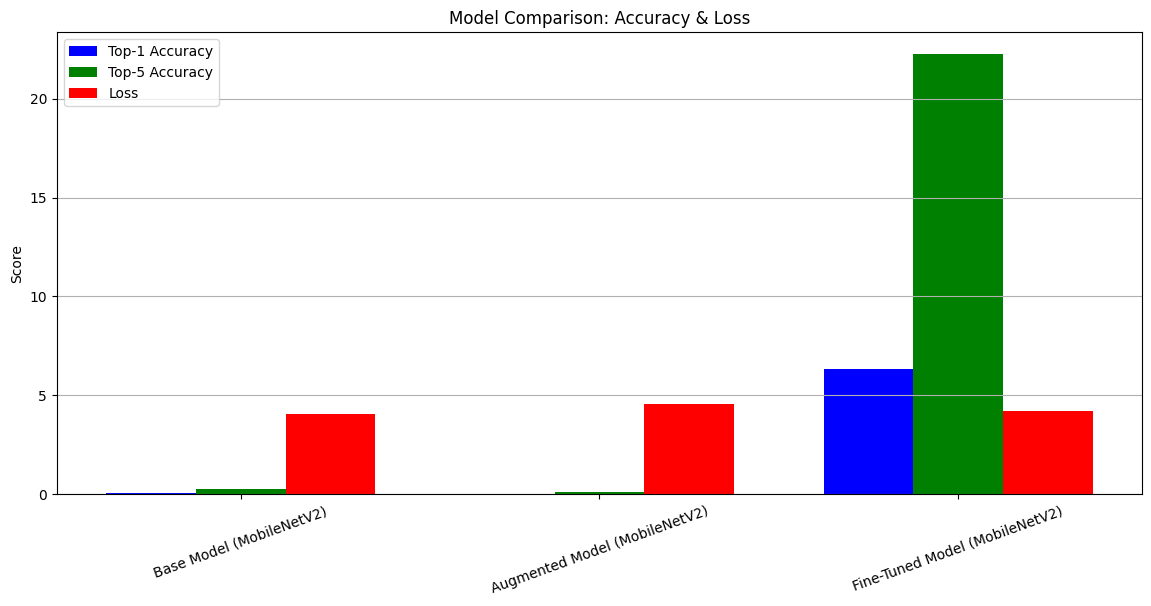

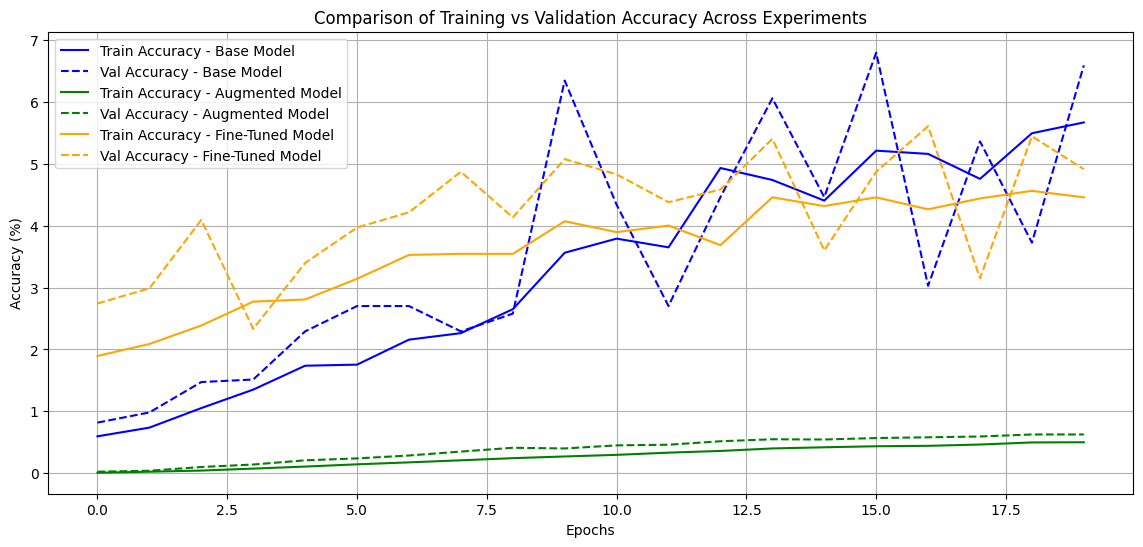

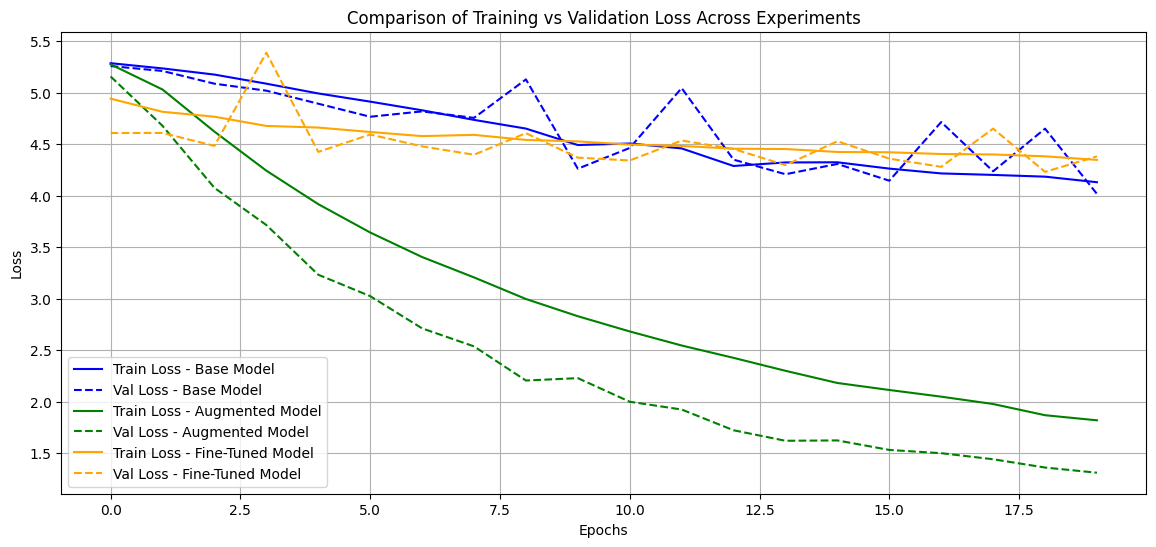

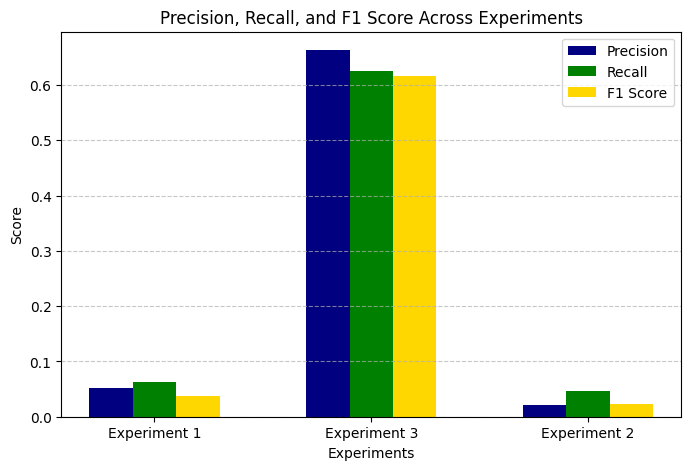

=== Model Performance Summary ===
Base Model (MobileNetV2):
  - Test Accuracy (Top-1): 0.07%
  - Test Accuracy (Top-5): 0.25%
  - Test Loss: 4.0556
----------------------------------------
Augmented Model (MobileNetV2):
  - Test Accuracy (Top-1): 0.03%
  - Test Accuracy (Top-5): 0.12%
  - Test Loss: 4.5794
----------------------------------------
Fine-Tuned Model (MobileNetV2):
  - Test Accuracy (Top-1): 6.32%
  - Test Accuracy (Top-5): 22.24%
  - Test Loss: 4.2044
----------------------------------------
time: 1.08 s (started: 2025-03-17 18:24:52 +00:00)


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.metrics import confusion_matrix
import torch

models = ["Base Model (MobileNetV2)", "Augmented Model (MobileNetV2)", "Fine-Tuned Model (MobileNetV2)"]


test_accuracies = [basic_model_test_accuracy, augmented_model_test_accuracy, fine_tuned_model_test_acc]
top_5_accuracies = [basic_model_top_5_accuracy, augmented_model_top_5_accuracy, fine_tuned_top_5_acc]
test_losses = [basic_model_average_test_loss, augmented_model_test_loss, fine_tuned_model_test_loss]


plt.figure(figsize=(14, 6))
x = np.arange(len(models))
width = 0.25

plt.bar(x - width, test_accuracies, width=width, label="Top-1 Accuracy", color="blue")
plt.bar(x, top_5_accuracies, width=width, label="Top-5 Accuracy", color="green")
plt.bar(x + width, test_losses, width=width, label="Loss", color="red")

plt.xticks(x, models, rotation=20)
plt.ylabel("Score")
plt.title("Model Comparison: Accuracy & Loss")
plt.legend()
plt.grid(axis="y")
plt.show()


plt.figure(figsize=(14, 6))
plt.plot(range(len(train_accs_1)), train_accs_1, label="Train Accuracy - Base Model", linestyle="-", color="blue")
plt.plot(range(len(val_accs_1)), val_accs_1, label="Val Accuracy - Base Model", linestyle="--", color="blue")
plt.plot(range(len(train_accs_2B)), train_accs_2B, label="Train Accuracy - Augmented Model", linestyle="-", color="green")
plt.plot(range(len(val_accs_2B)), val_accs_2B, label="Val Accuracy - Augmented Model", linestyle="--", color="green")
plt.plot(range(len(train_accs_3)), train_accs_3, label="Train Accuracy - Fine-Tuned Model", linestyle="-", color="orange")
plt.plot(range(len(val_accs_3)), val_accs_3, label="Val Accuracy - Fine-Tuned Model", linestyle="--", color="orange")

plt.xlabel("Epochs")
plt.ylabel("Accuracy (%)")
plt.title("Comparison of Training vs Validation Accuracy Across Experiments")
plt.legend()
plt.grid(True)
plt.show()


plt.figure(figsize=(14, 6))
plt.plot(range(len(train_losses_1)), train_losses_1, label="Train Loss - Base Model", linestyle="-", color="blue")
plt.plot(range(len(val_losses_1)), val_losses_1, label="Val Loss - Base Model", linestyle="--", color="blue")
plt.plot(range(len(train_losses_2B)), train_losses_2B, label="Train Loss - Augmented Model", linestyle="-", color="green")
plt.plot(range(len(val_losses_2B)), val_losses_2B, label="Val Loss - Augmented Model", linestyle="--", color="green")
plt.plot(range(len(train_losses_3)), train_losses_3, label="Train Loss - Fine-Tuned Model", linestyle="-", color="orange")
plt.plot(range(len(val_losses_3)), val_losses_3, label="Val Loss - Fine-Tuned Model", linestyle="--", color="orange")

plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Comparison of Training vs Validation Loss Across Experiments")
plt.legend()
plt.grid(True)
plt.show()


def plot_confusion_matrix(model, dataloader, model_name, device):
    model.eval()
    all_labels = []
    all_preds = []

    with torch.no_grad():
        for images, labels in dataloader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            _, predicted = torch.max(outputs, 1)

            all_labels.extend(labels.cpu().numpy())
            all_preds.extend(predicted.cpu().numpy())

    cm = confusion_matrix(all_labels, all_preds)
    plt.figure(figsize=(10, 8))
    sns.heatmap(cm, annot=False, cmap="Blues", fmt="d")
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.title(f"Confusion Matrix - {model_name}")
    plt.show()





experiments = ["Experiment 1", "Experiment 3", "Experiment 2"]


precision_scores = [val_precisions_1[-1], val_precisions_2B[-1], val_precisions_3[-1]]
recall_scores = [val_recalls_1[-1], val_recalls_2B[-1], val_recalls_3[-1]]
f1_scores = [val_f1s_1[-1], val_f1s_2B[-1], val_f1s_3[-1]]


bar_width = 0.2


x = np.arange(len(experiments))


plt.figure(figsize=(8, 5))
plt.bar(x - bar_width, precision_scores, width=bar_width, label="Precision", color="navy")
plt.bar(x, recall_scores, width=bar_width, label="Recall", color="green")
plt.bar(x + bar_width, f1_scores, width=bar_width, label="F1 Score", color="gold")


plt.xlabel("Experiments")
plt.ylabel("Score")
plt.title("Precision, Recall, and F1 Score Across Experiments")
plt.xticks(x, experiments)
plt.legend()
plt.grid(axis="y", linestyle="--", alpha=0.7)


plt.show()



print("=== Model Performance Summary ===")
for i in range(len(models)):
    print(f"{models[i]}:")
    print(f"  - Test Accuracy (Top-1): {test_accuracies[i]:.2f}%")
    print(f"  - Test Accuracy (Top-5): {top_5_accuracies[i]:.2f}%")
    print(f"  - Test Loss: {test_losses[i]:.4f}")
    print("-" * 40)


## **Test Environment - Winning Model**

This code sets up a testing environment for evaluating the fine-tuned CNN model trained for vehicle classification. The model architecture includes convolutional layers, batch normalization, and dropout, followed by fully connected layers for classification into 196 car categories. The pre-trained model weights are loaded. The user uploads an image from their device. The image undergoes preprocessing (resizing, normalization, and tensor conversion) before being passed through the model. The model predicts the car category, and the result is displayed above the image, allowing for an interactive and qualitative evaluation of the model's classification accuracy.

Using device: cuda
Model loaded successfully!
Please upload an image:


Saving ex7.png to ex7.png
Selected image: ex7.png


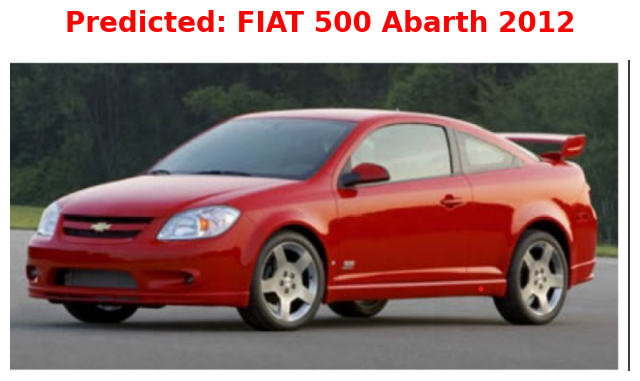

time: 10.6 s (started: 2025-03-17 18:42:13 +00:00)


In [ ]:
import torch
import torch.nn as nn
from torchvision import transforms
import matplotlib.pyplot as plt
from PIL import Image
import os


try:
    from google.colab import files
    colab_env = True
except ImportError:
    colab_env = False


device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")


class FineTunedCNN(nn.Module):
    def __init__(self, num_classes=196):
        super(FineTunedCNN, self).__init__()
        self.features = nn.Sequential(
            nn.Conv2d(3, 64, 3, padding=1), nn.BatchNorm2d(64), nn.ReLU(), nn.MaxPool2d(2),
            nn.Conv2d(64, 128, 3, padding=1), nn.BatchNorm2d(128), nn.ReLU(), nn.MaxPool2d(2),
            nn.Conv2d(128, 256, 3, padding=1), nn.BatchNorm2d(256), nn.ReLU(), nn.MaxPool2d(2),
            nn.Conv2d(256, 512, 3, padding=1), nn.BatchNorm2d(512), nn.ReLU(), nn.AdaptiveAvgPool2d((4,4)),
        )
        self.classifier = nn.Sequential(
            nn.Flatten(),
            nn.Dropout(0.4),
            nn.Linear(512 * 4 * 4, 1024), nn.ReLU(),
            nn.Linear(1024, num_classes)
        )

    def forward(self, x):
        x = self.features(x)
        x = self.classifier(x)
        return x



model = FineTunedCNN().to(device)
model.load_state_dict(torch.load(MODEL_WEIGHTS_PATH, map_location=device))
model.eval()
print("Model loaded successfully!")


if colab_env:
    print("Please upload an image:")
    uploaded = files.upload()
    image_path = list(uploaded.keys())[0]
else:
    image_path = input("Enter the path to the image: ").strip()

if not os.path.exists(image_path):
    print("No image found. Exiting...")
    exit()

print(f"Selected image: {image_path}")


image = Image.open(image_path).convert('RGB')


transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

input_tensor = transform(image).unsqueeze(0).to(device)


with torch.no_grad():
    outputs = model(input_tensor)
    _, predicted = outputs.max(1)
    predicted_class = predicted.item()

predicted_class_name = train_class_names[predicted_class]


fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(image)
ax.axis("off")

ax.set_title(
    f"Predicted: {predicted_class_name}",
    fontsize=20, fontweight="bold", color="red", pad=20
)

plt.show()


##**Analysis Results:**
**The winning model did indeed correctly predict the vehicle label shown in the image.
(Based on a comparison made against the actual label from the dataset)**